In [39]:
# the key idea is that instead of doing L2 training we do sobolev training ! 

# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.3'
#       jupytext_version: 1.17.2
#   kernelspec:
#     display_name: .venv
#     language: python
#     name: python3
# ---

In [40]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sciml.data.preprocessing.process_given_dataset import get_mu_xs_sol

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [41]:
d_p = 100
d_V = 100
epochs = 10

trying to enforce the boundary condition

In [42]:
class ConstrainedExternalModel(tf.keras.Model):
    def __init__(self, base_model, d_V):
        super().__init__()
        self.base_model = base_model
        self.d_V = d_V
    
    def call(self, x):
        """
        External model with boundary constraints: forces solution to be 0 at x=0 and x=1
        Uses basis functions that vanish at boundaries: x*(1-x), x^2*(1-x), etc.
        """
        # we get the base model output for learnable coefficients
        base_output = self.base_model(x)  # shape: (batch*n_points, d_V-1)
        
        # we extract x coordinates 
        x_coords = tf.squeeze(x, axis=-1)  # shape: (batch*n_points,)
        
        # we create basis functions that vanish at boundaries
        # First basis: x*(1-x) - vanishes at both x=0 and x=1
        basis_boundary = tf.expand_dims(x_coords * (1.0 - x_coords), axis=1)
        
        # we multiply all learned bases by x*(1-x) to ensure they vanish at boundaries
        x_factor = tf.expand_dims(x_coords * (1.0 - x_coords), axis=1)
        constrained_bases = base_output * x_factor
        
        # we concatenate: [x*(1-x), constrained_bases...]
        constrained_output = tf.concat([basis_boundary, constrained_bases], axis=1)
        
        return constrained_output

# we create the normal internal model (no constraints needed)
internal_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(100,)),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(d_V, activation='elu')
    # full d_V output
])

# we create the constrained external model
base_external = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(1,)),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(d_V-1, activation='elu')  # we reduce by 1 for the boundary basis
])

external_model = ConstrainedExternalModel(base_external, d_V)

In [43]:
folder_path = "/home/janis/SCIML/summerschool/data/benchmarks/given/"
coeff = tf.constant([-0.01,0.5,0],dtype=tf.float32)

In [44]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"pinn_order":2,"pinn_coeff": coeff,"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs,"learning_rate":0.001},folder_path="/home/janis/SCIML/summerschool/data/benchmarks/given/")

2025-08-06 11:26:04,313 - sciml.model.deeponet.deeponet - INFO - Model initialized with 10 epochs, 32 batch size, 0.001 learning rate


In [45]:
mus, xs, sol = get_mu_xs_sol(folder_path,0.5)

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


In [46]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(2000, 100)
(2000, 100, 1)
(2000, 100)


mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-06 11:26:09,381 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-06 11:26:09,382 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.047643
2025-08-06 11:26:09,382 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.044742
Training progress:  10%|█         | 1/10 [00:04<00:39,  4.38s/it]2025-08-06 11:26:11,772 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-06 11:26:11,772 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.041414
2025-08-06 11:26:11,773 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.039362
Training progress:  20%|██        | 2/10 [00:06<00:25,  3.21s/it]2025-08-06 11:26:14,062 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-06 11:26:14,063 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.036168
2025-08-06 11:26:14,063 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.035246
Training progress:  30%|███       | 3/10 [00:09<00:19,  2.79s/i

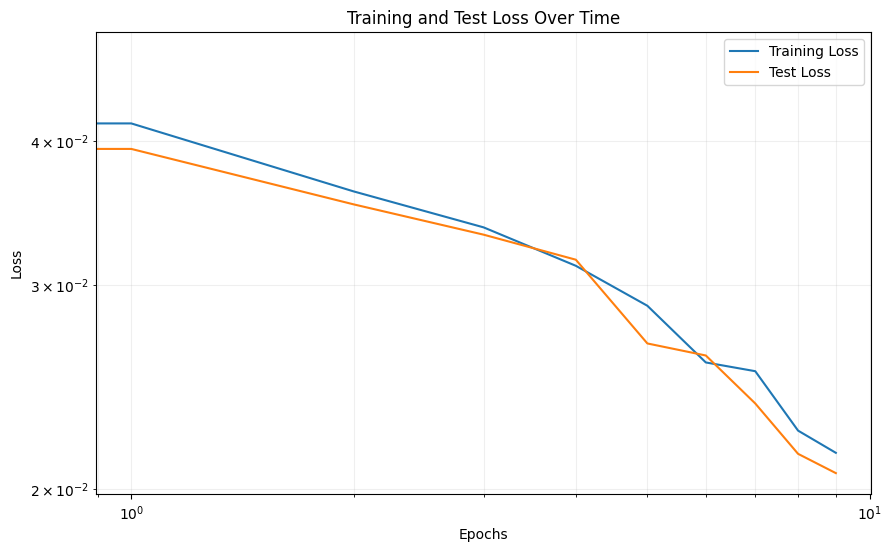

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


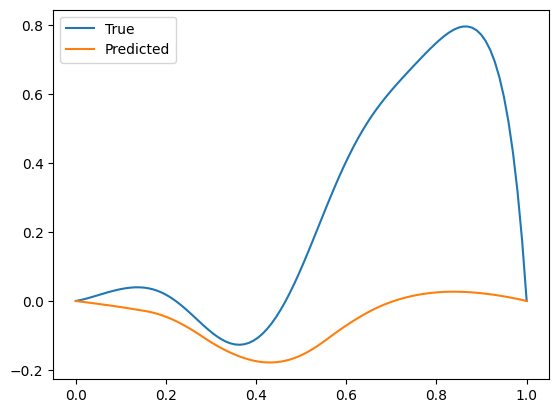

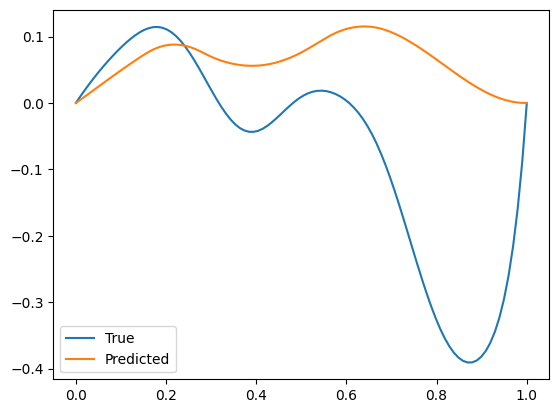

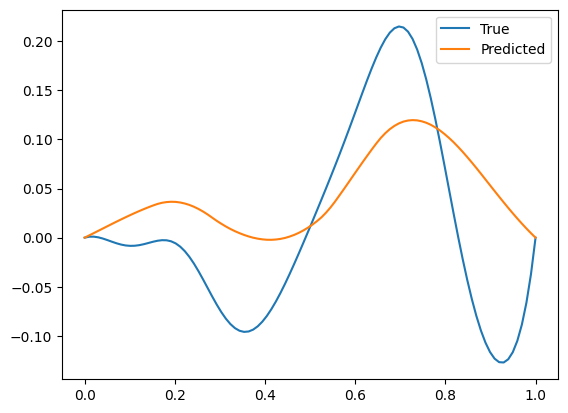

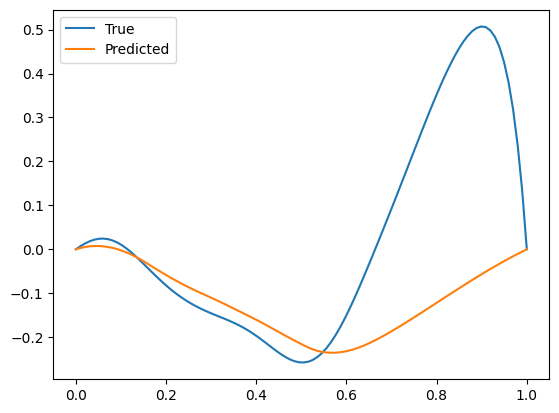

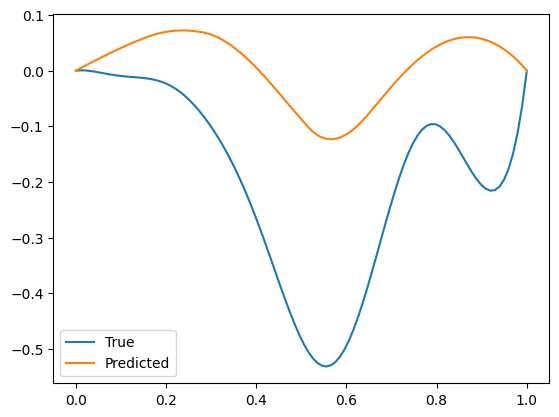

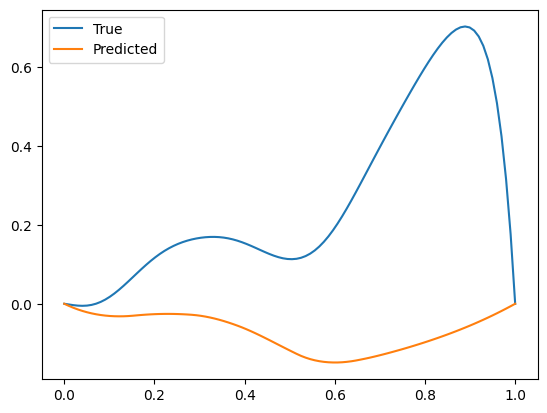

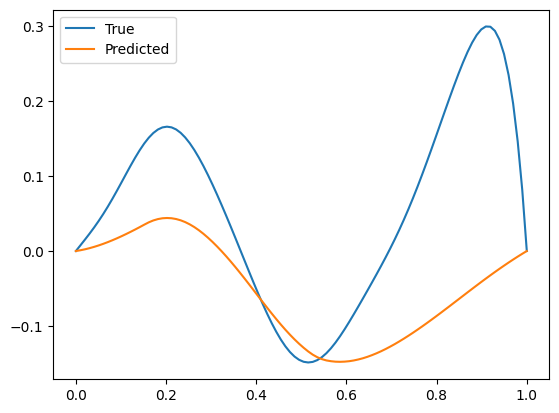

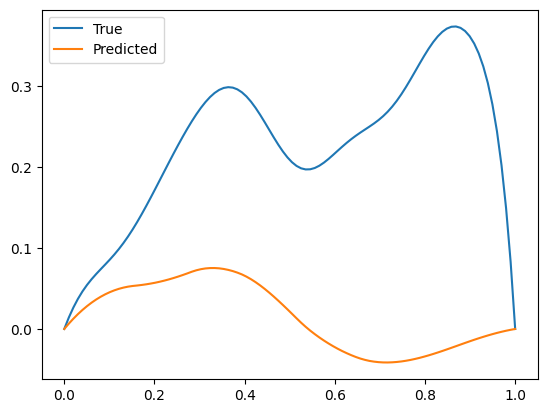

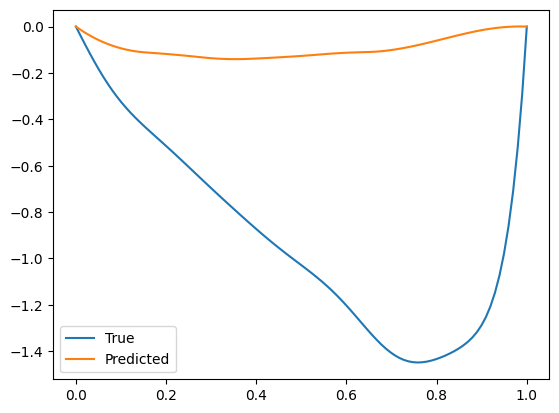

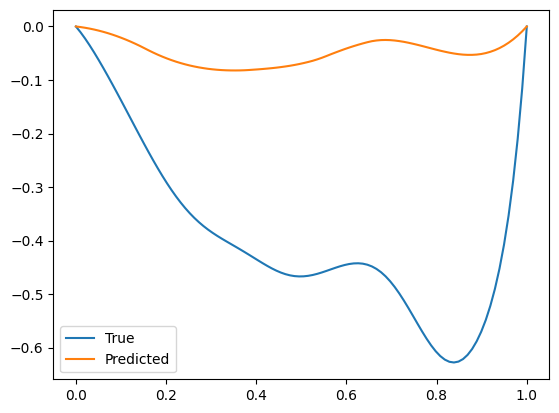

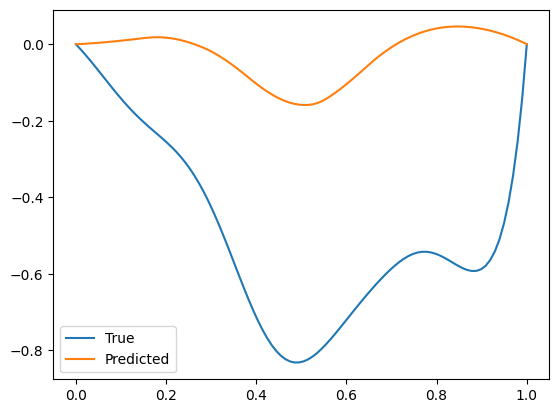

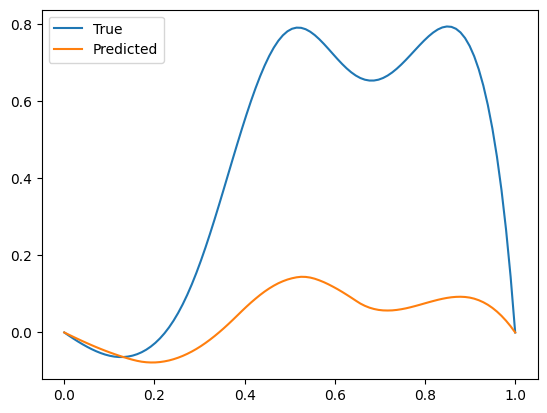

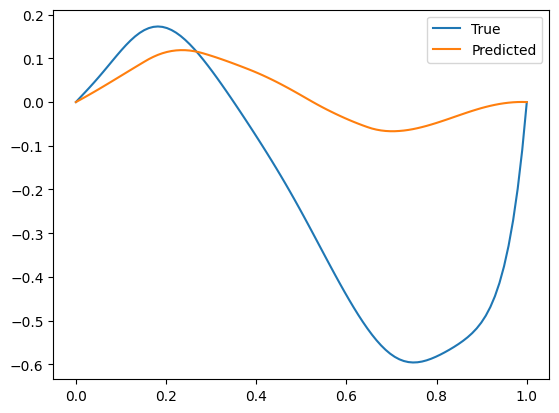

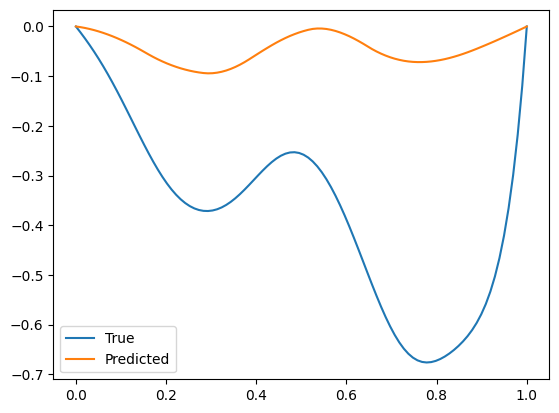

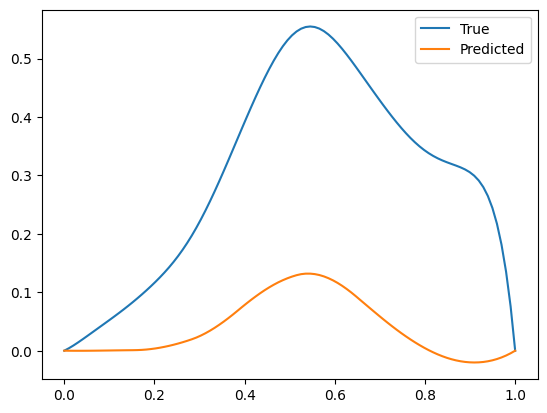

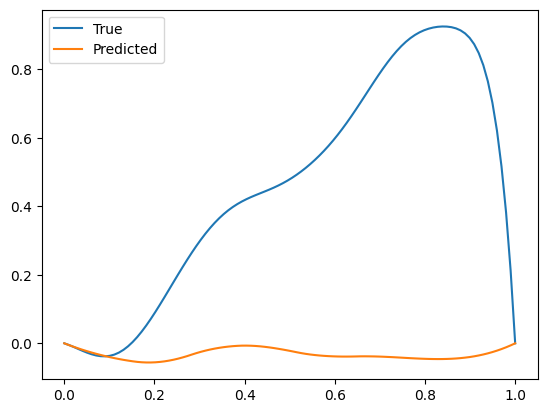

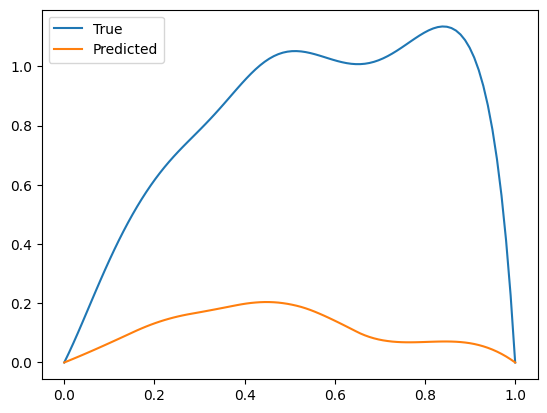

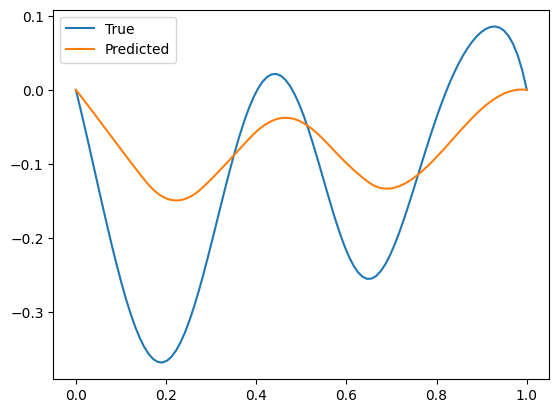

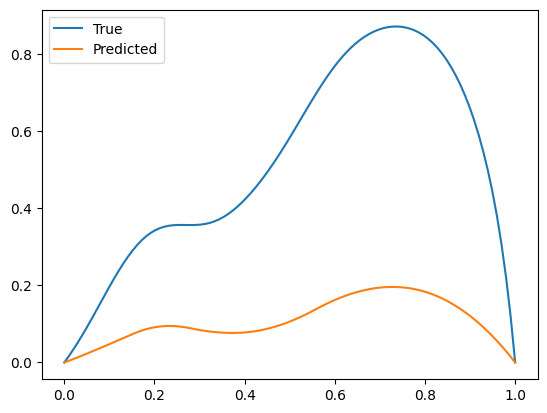

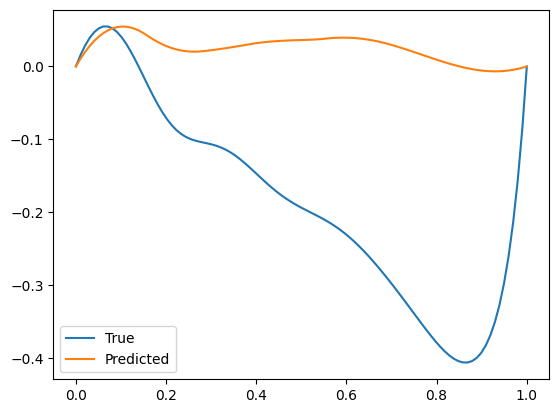

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-06 11:26:39,838 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-06 11:26:39,838 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.020524
2025-08-06 11:26:39,839 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.019519
Training progress:  10%|█         | 1/10 [00:02<00:26,  2.90s/it]2025-08-06 11:26:42,118 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-06 11:26:42,119 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.019578
2025-08-06 11:26:42,119 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.018878
Training progress:  20%|██        | 2/10 [00:05<00:20,  2.54s/it]2025-08-06 11:26:44,522 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-06 11:26:44,523 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.018660
2025-08-06 11:26:44,523 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.018826
Training progress:  30%|███       | 3/10 [00:07<00:17,  2.48s/i

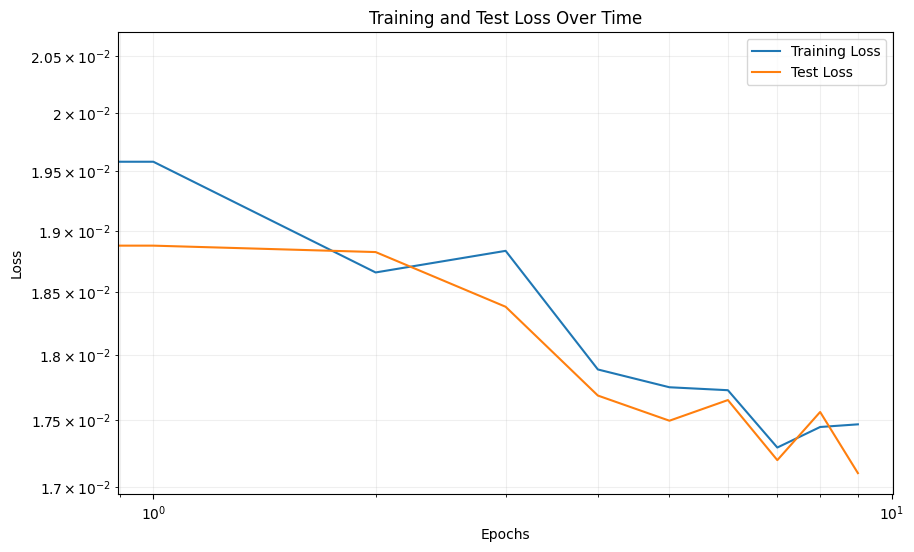

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


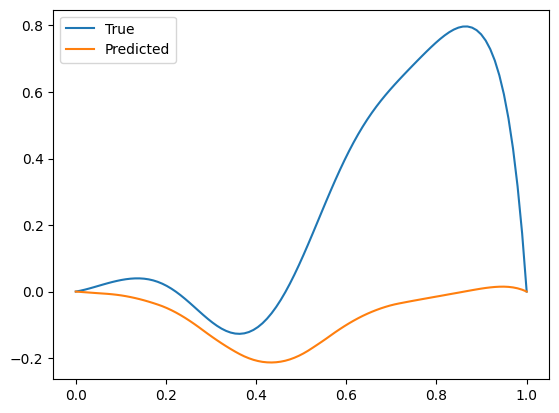

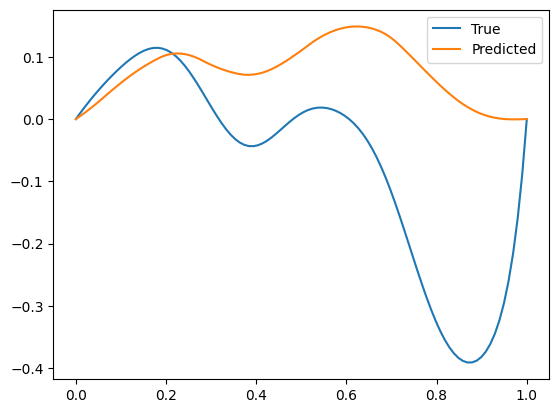

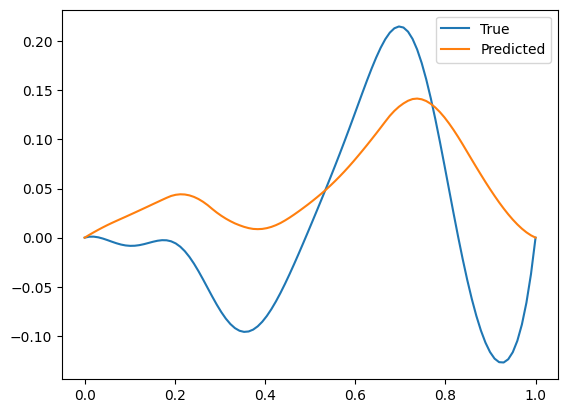

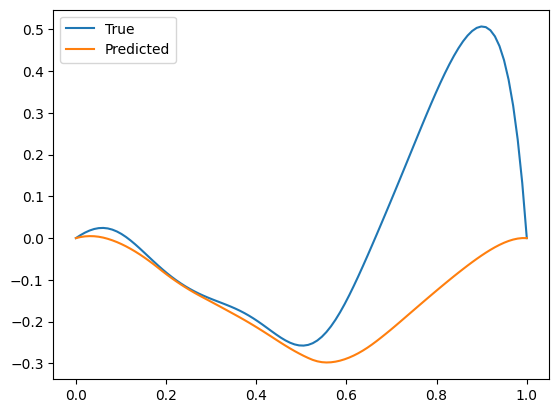

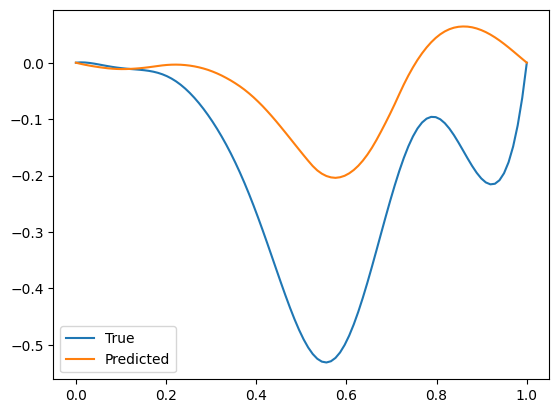

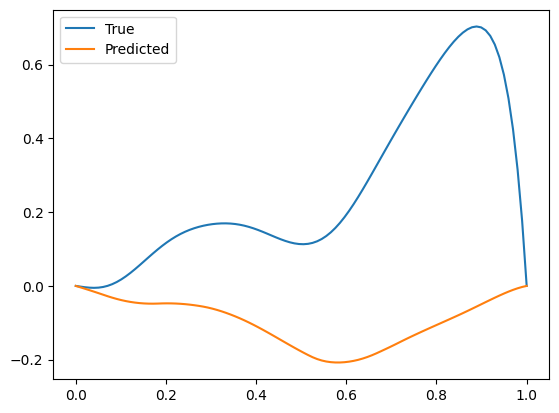

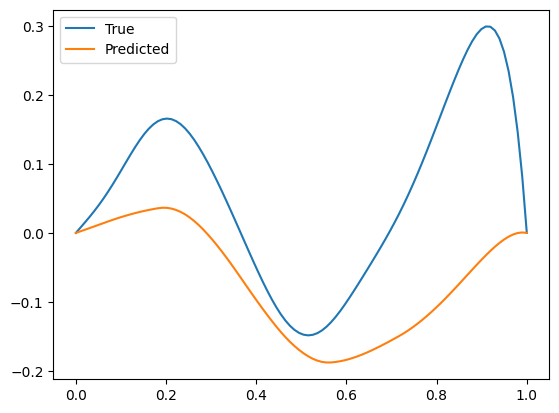

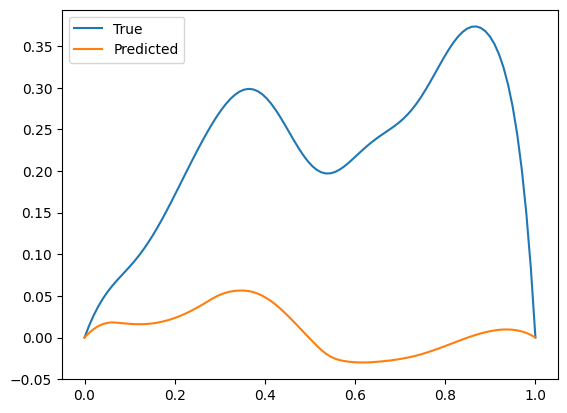

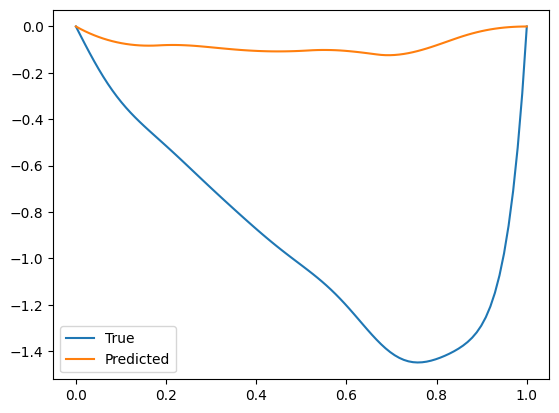

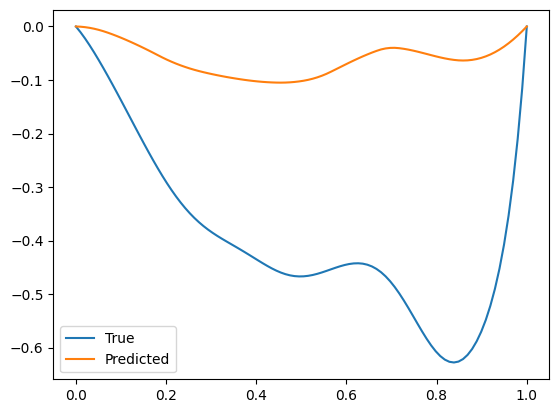

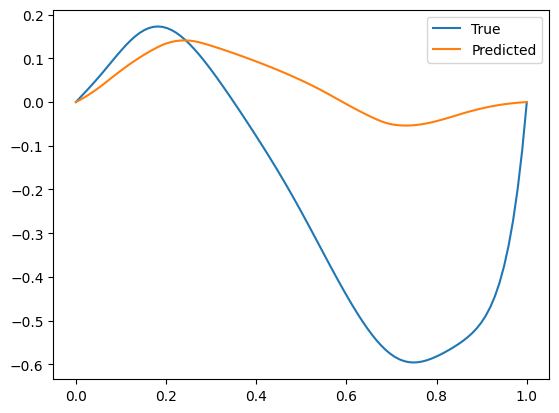

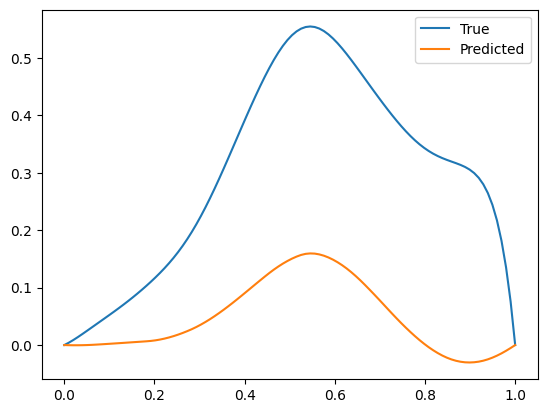

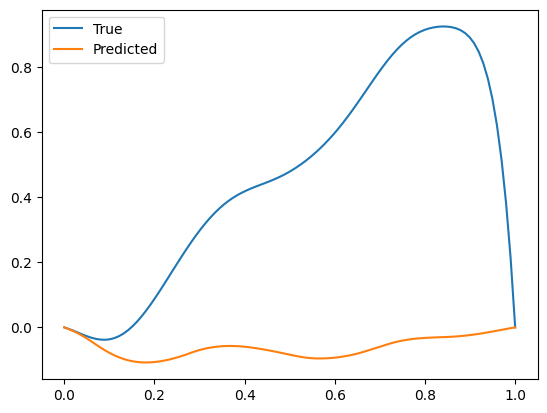

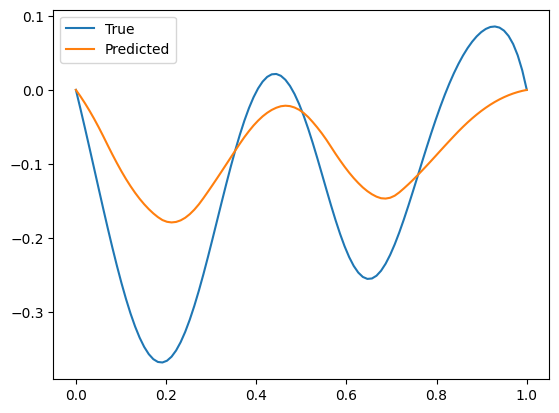

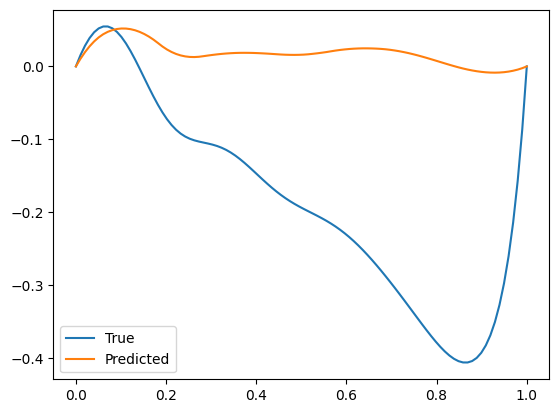

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-06 11:27:11,466 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-06 11:27:11,467 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.017119
2025-08-06 11:27:11,467 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.017067
Training progress:  10%|█         | 1/10 [00:02<00:22,  2.54s/it]2025-08-06 11:27:13,984 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-06 11:27:13,985 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.016738
2025-08-06 11:27:13,986 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.016935
Training progress:  20%|██        | 2/10 [00:05<00:20,  2.53s/it]2025-08-06 11:27:16,348 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-06 11:27:16,349 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.016696
2025-08-06 11:27:16,350 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.016897
Training progress:  30%|███       | 3/10 [00:07<00:17,  2.45s/i

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


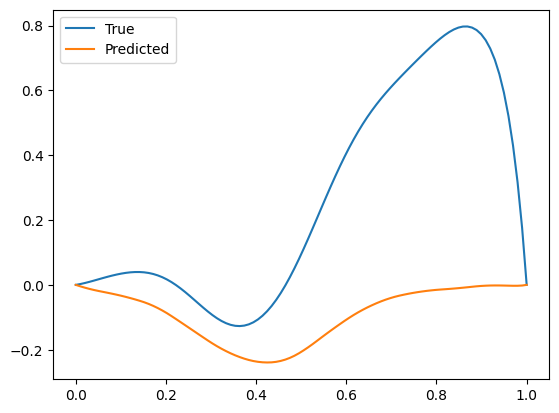

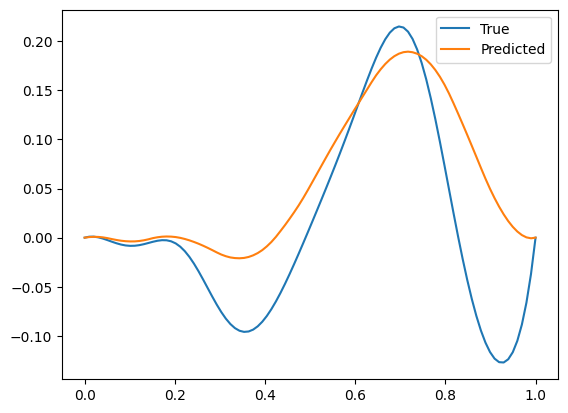

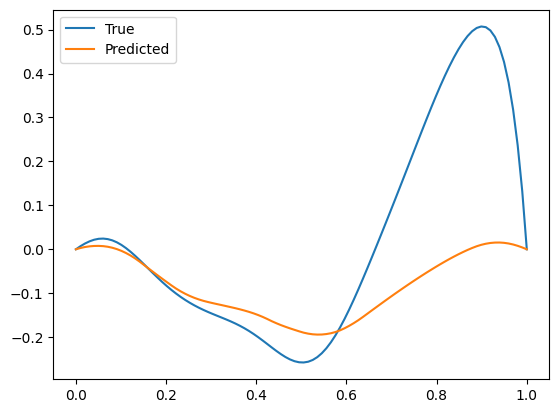

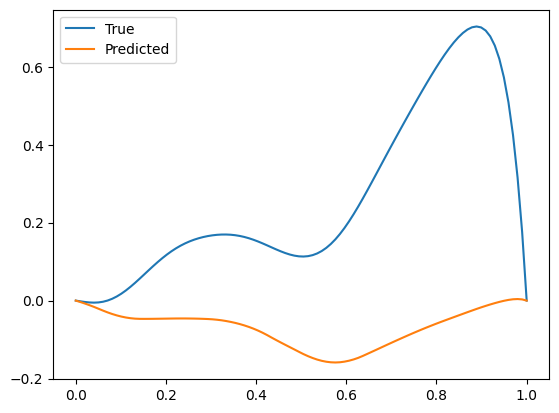

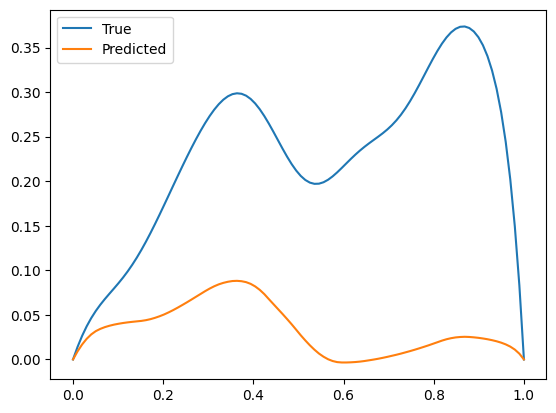

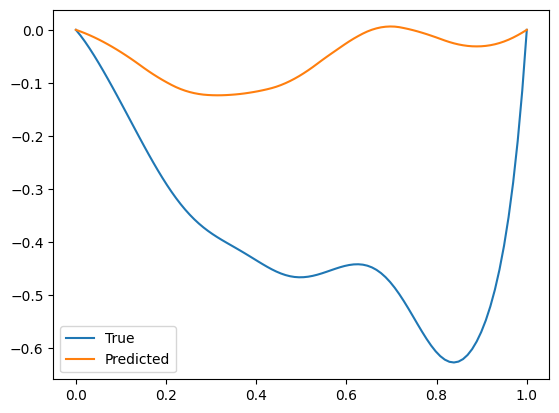

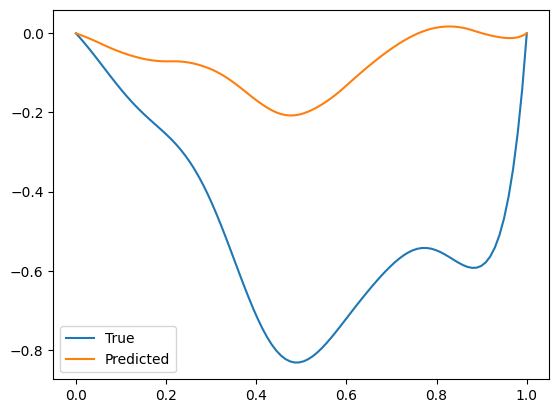

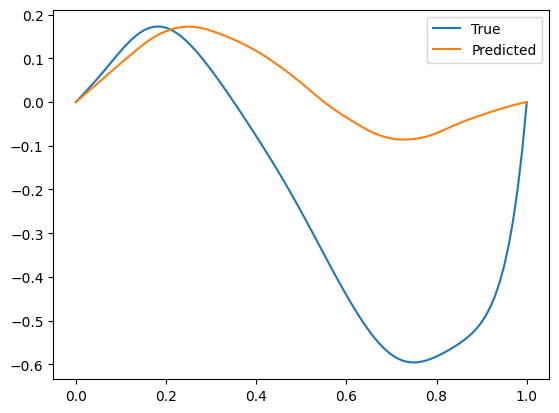

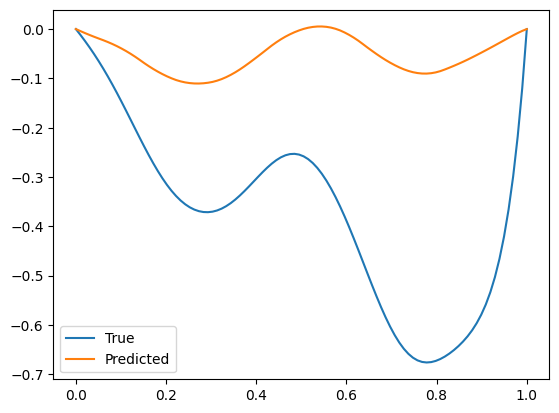

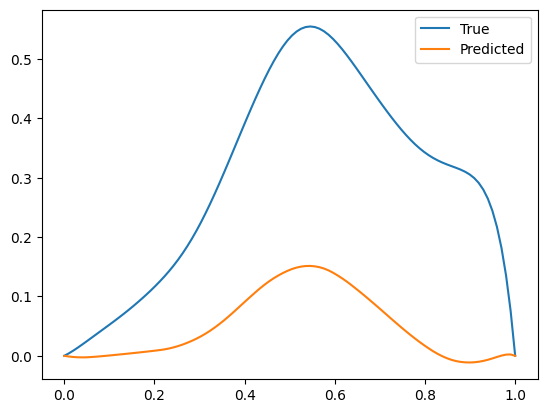

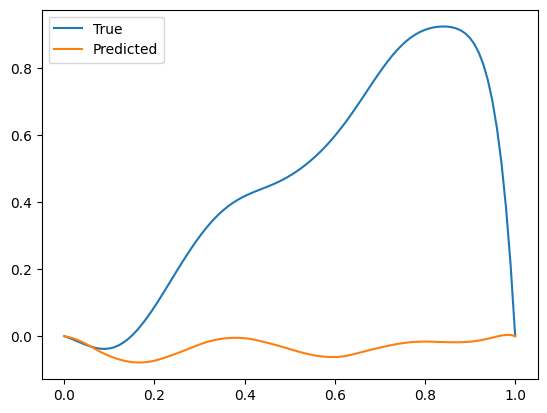

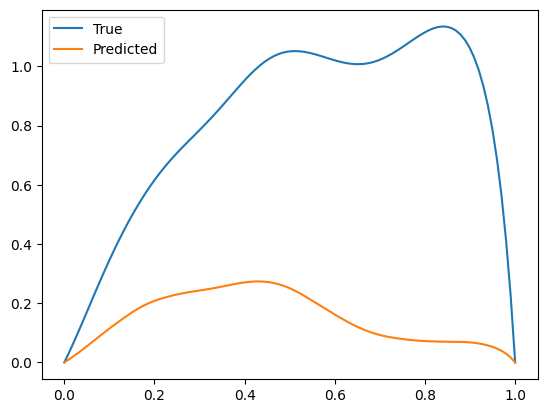

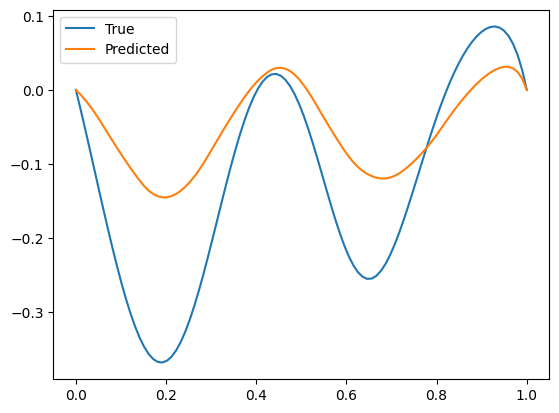

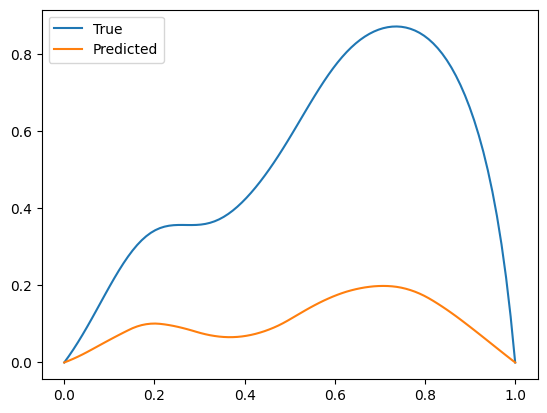

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-06 11:27:40,929 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-06 11:27:40,930 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.017675
2025-08-06 11:27:40,931 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.015103
Training progress:  10%|█         | 1/10 [00:02<00:22,  2.54s/it]2025-08-06 11:27:43,259 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-06 11:27:43,260 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.015945
2025-08-06 11:27:43,261 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.014366
Training progress:  20%|██        | 2/10 [00:04<00:19,  2.42s/it]2025-08-06 11:27:45,663 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-06 11:27:45,664 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.018818
2025-08-06 11:27:45,664 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.019865
Training progress:  30%|███       | 3/10 [00:07<00:16,  2.41s/i

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


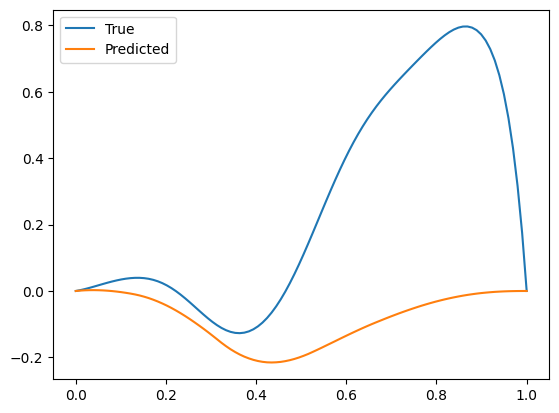

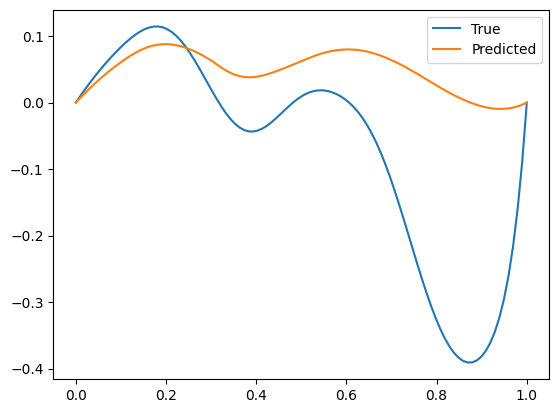

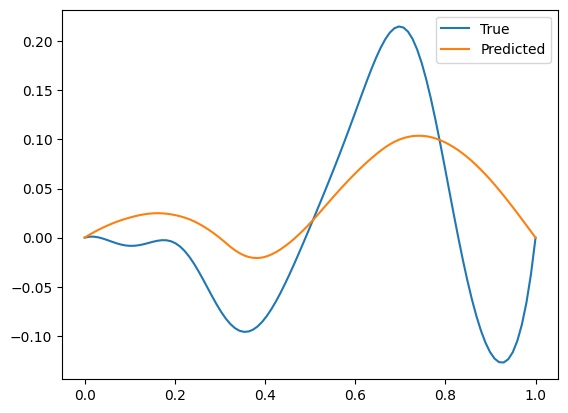

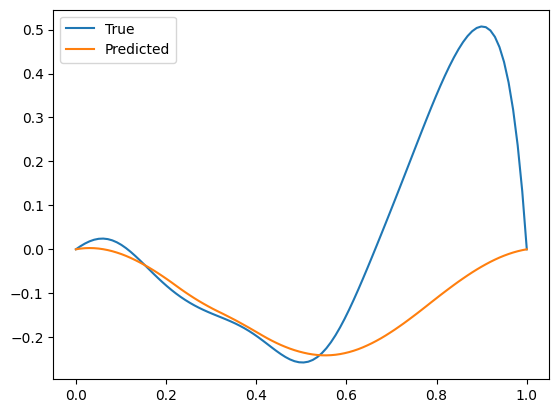

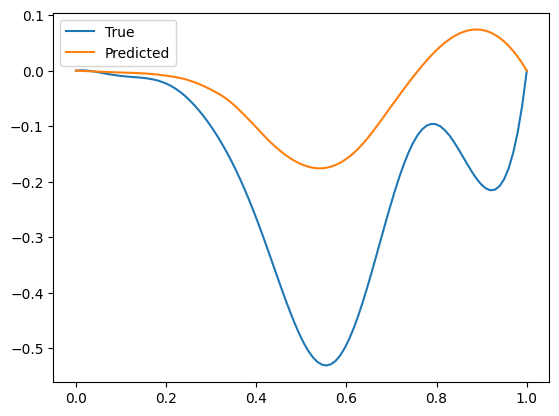

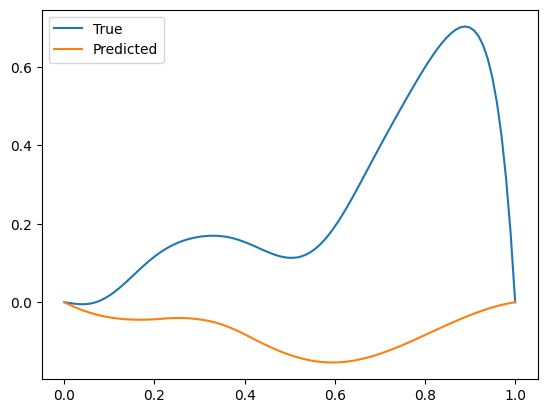

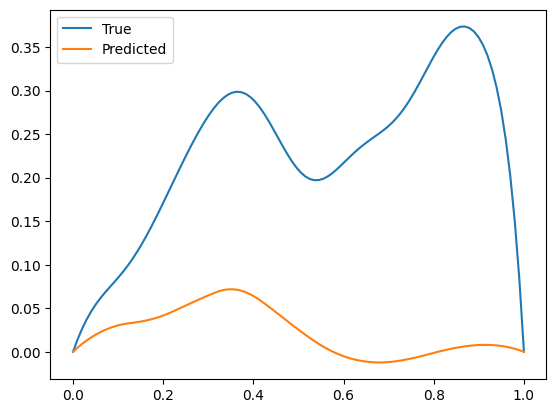

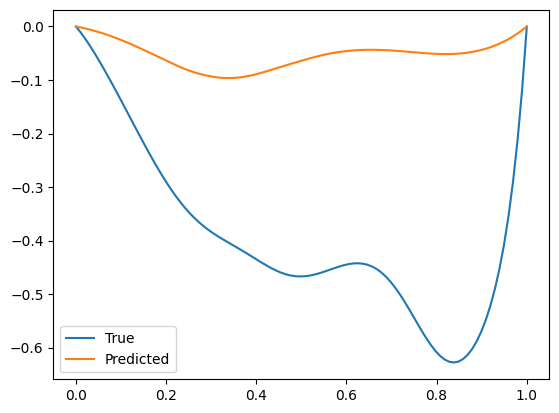

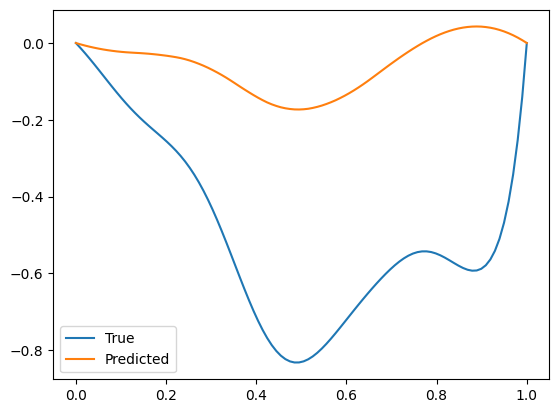

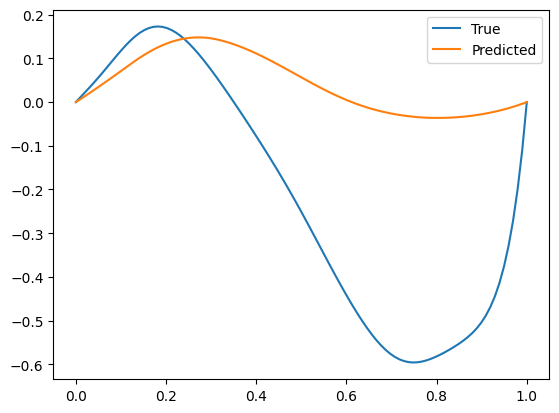

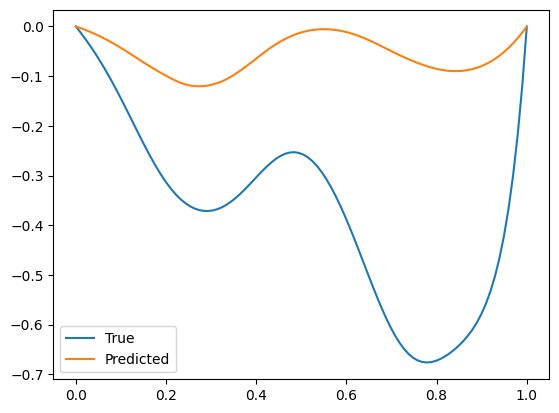

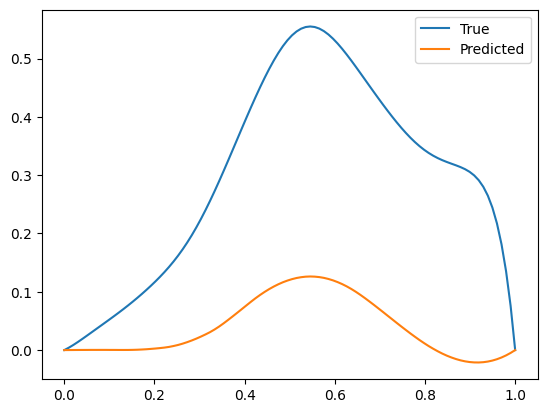

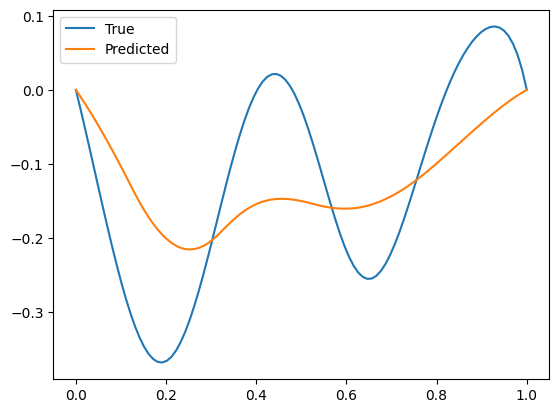

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-06 11:28:11,491 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-06 11:28:11,492 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.022520
2025-08-06 11:28:11,493 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.021466
Training progress:  10%|█         | 1/10 [00:06<00:58,  6.53s/it]2025-08-06 11:28:14,036 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-06 11:28:14,037 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.020686
2025-08-06 11:28:14,037 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.019695
Training progress:  20%|██        | 2/10 [00:09<00:33,  4.18s/it]2025-08-06 11:28:16,702 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-06 11:28:16,703 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.019431
2025-08-06 11:28:16,704 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.018798
Training progress:  30%|███       | 3/10 [00:11<00:24,  3.49s/i

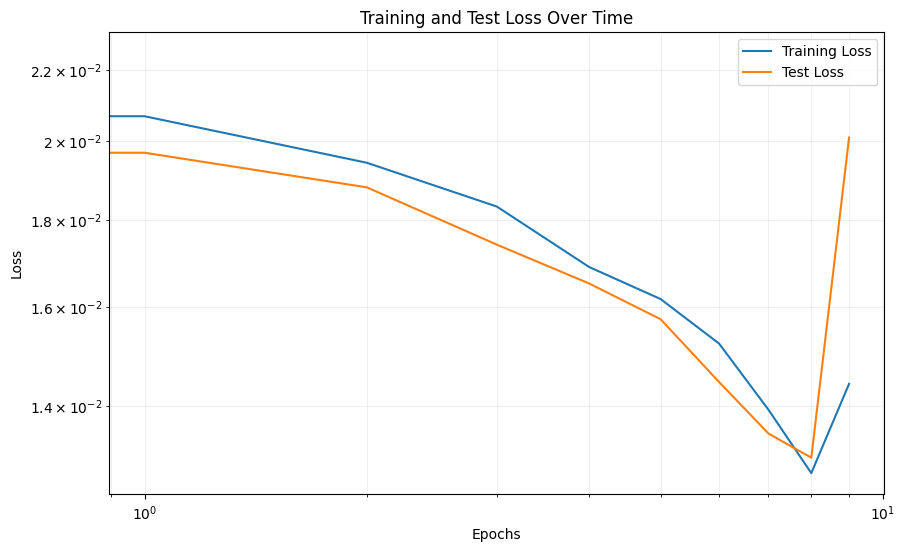

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


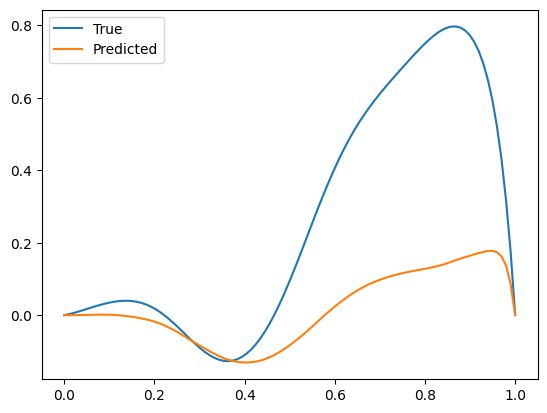

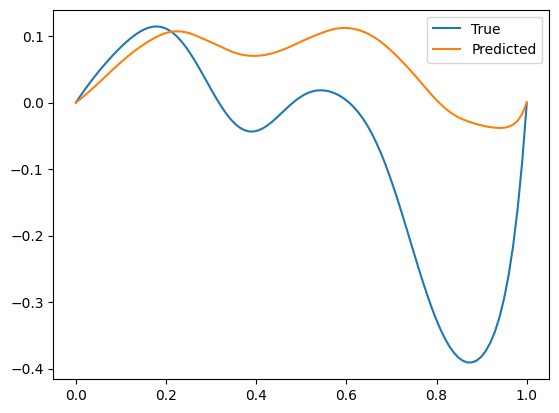

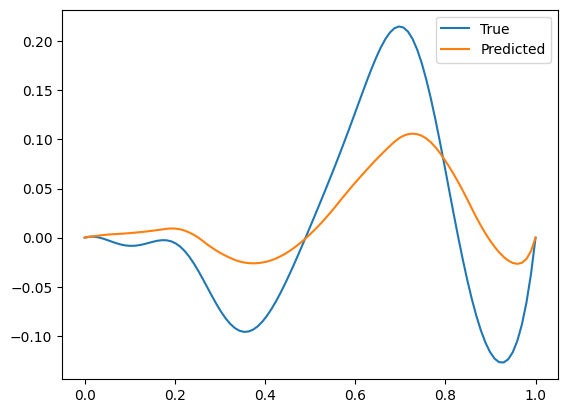

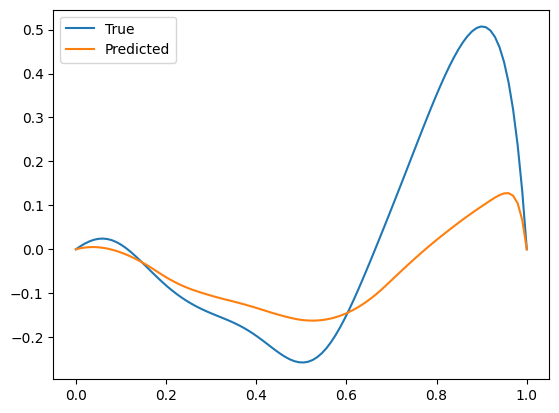

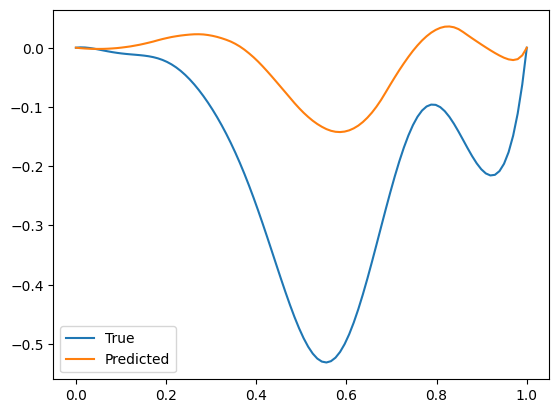

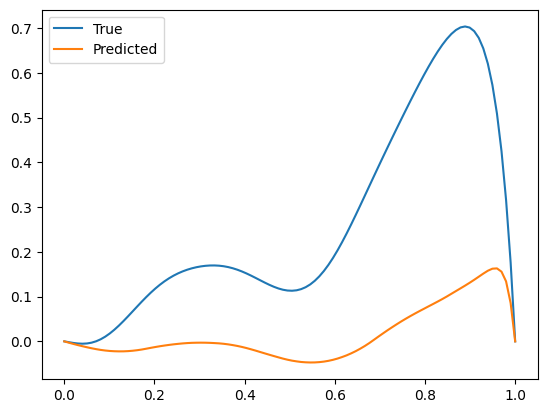

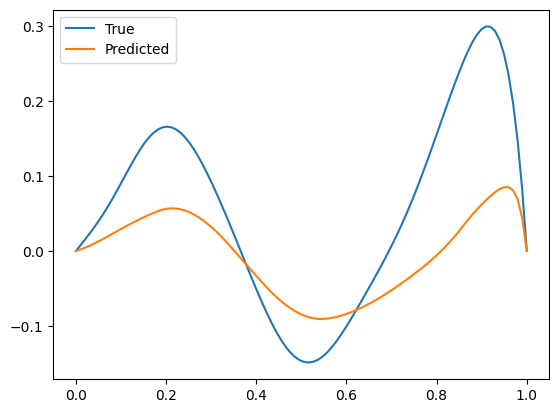

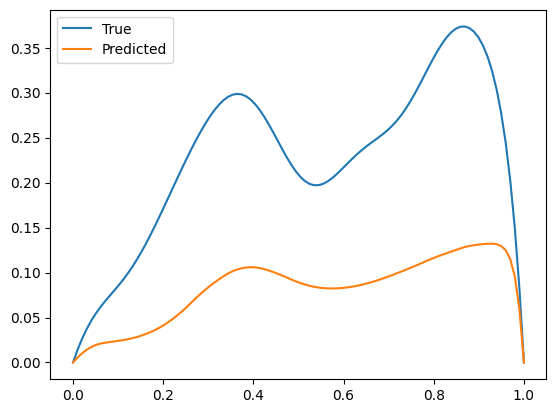

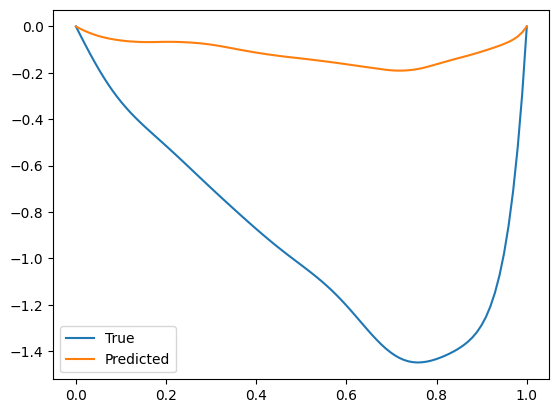

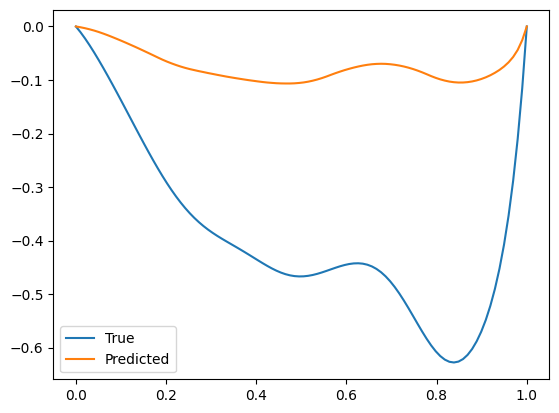

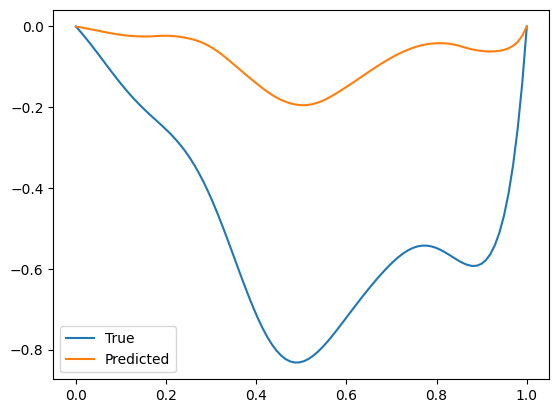

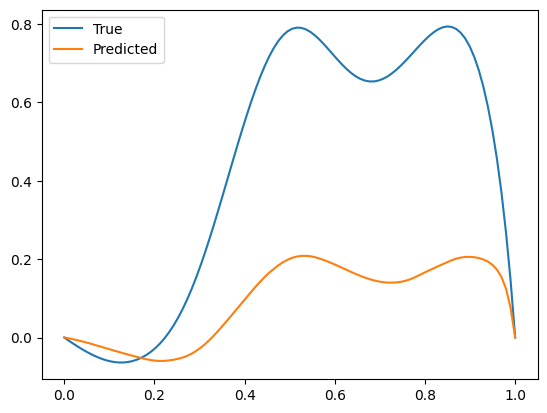

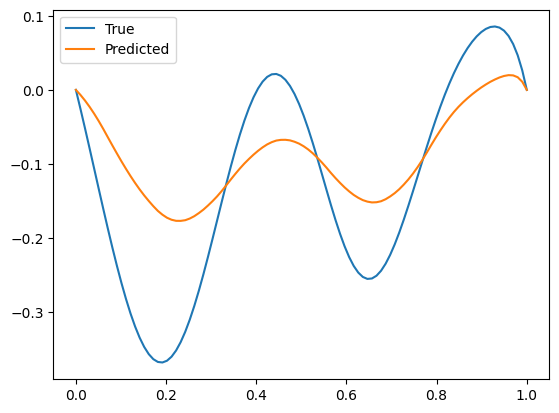

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-06 11:28:40,086 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-06 11:28:40,087 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.016403
2025-08-06 11:28:40,088 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.012195
Training progress:  10%|█         | 1/10 [00:03<00:30,  3.40s/it]2025-08-06 11:28:44,928 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-06 11:28:44,928 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.013705
2025-08-06 11:28:44,929 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.020465
Training progress:  20%|██        | 2/10 [00:08<00:33,  4.25s/it]2025-08-06 11:28:47,357 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-06 11:28:47,357 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.016952
2025-08-06 11:28:47,358 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.015682
Training progress:  30%|███       | 3/10 [00:10<00:23,  3.42s/i

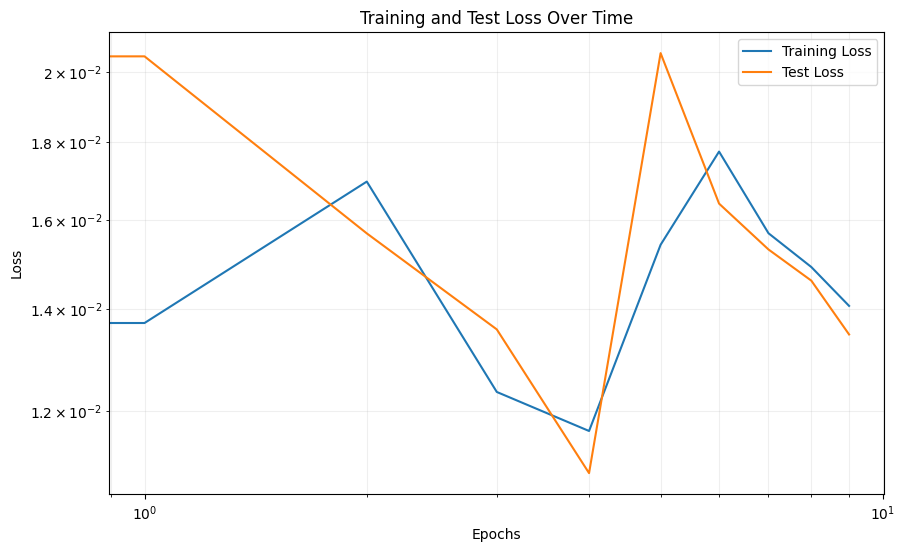

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


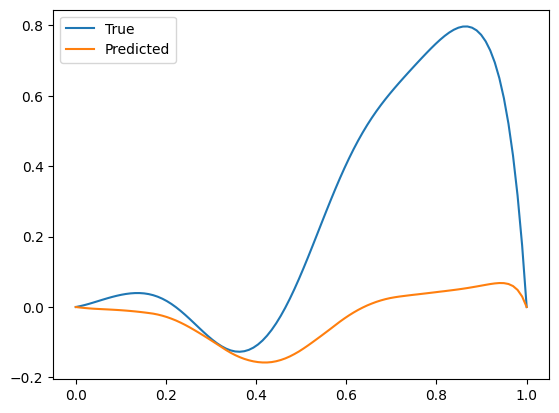

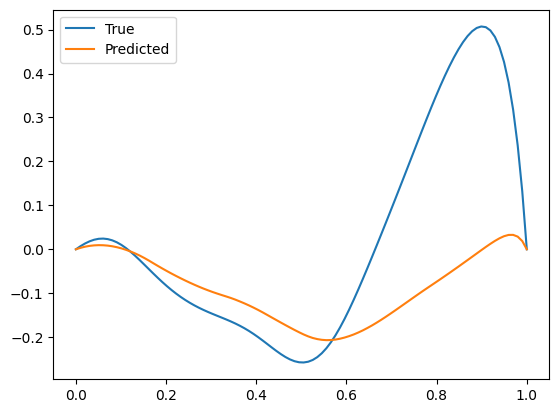

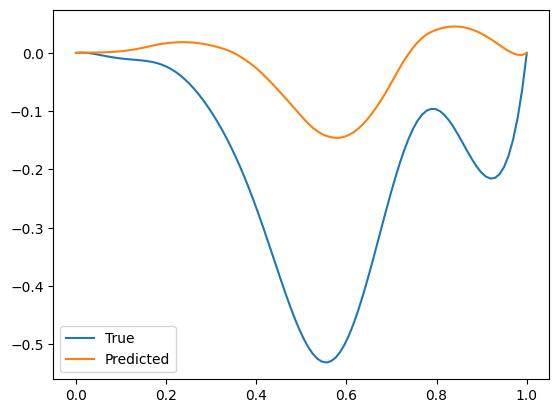

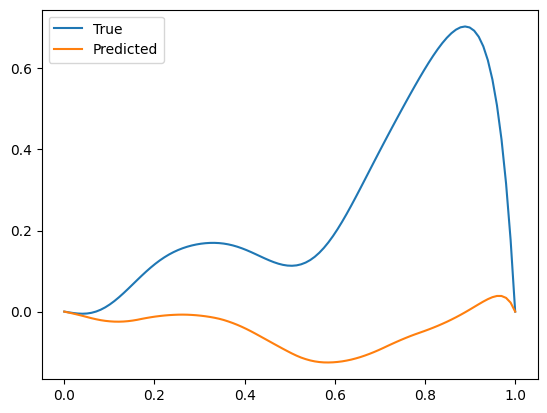

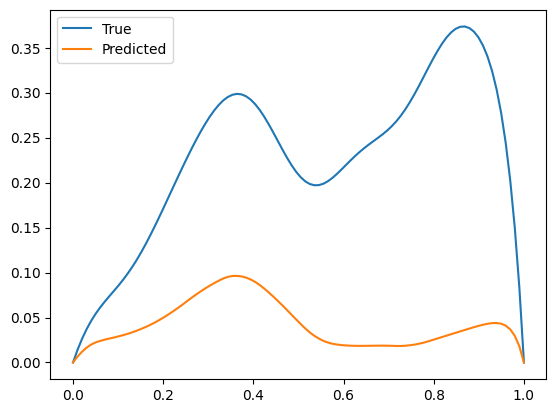

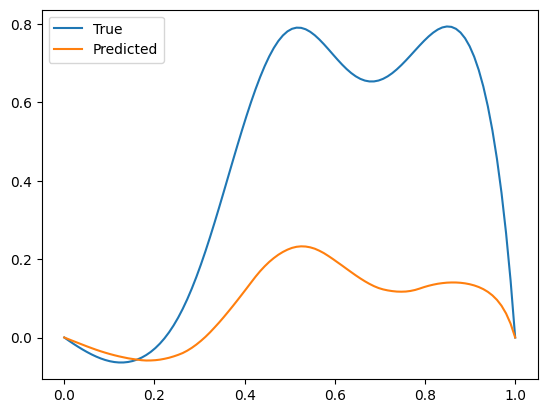

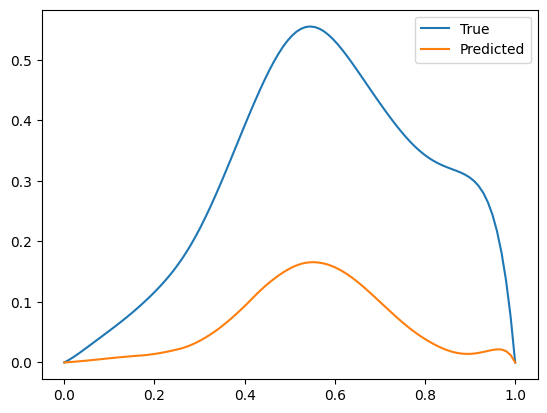

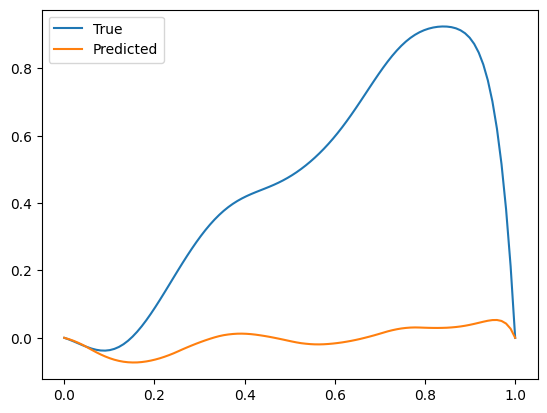

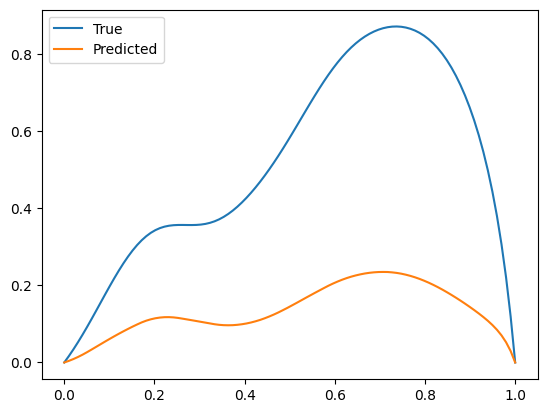

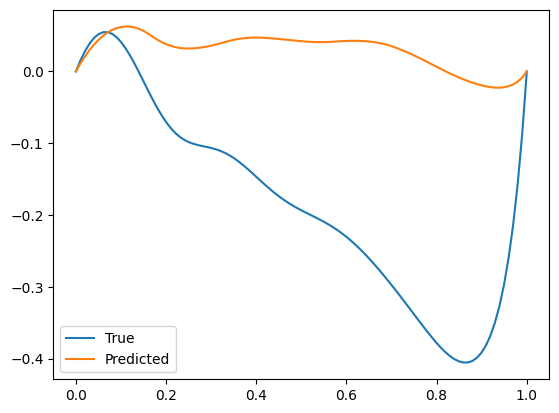

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-06 11:29:09,557 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-06 11:29:09,558 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.012588
2025-08-06 11:29:09,559 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.011986
Training progress:  10%|█         | 1/10 [00:02<00:26,  2.96s/it]2025-08-06 11:29:11,976 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-06 11:29:11,978 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.013145
2025-08-06 11:29:11,979 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.024206
Training progress:  20%|██        | 2/10 [00:05<00:21,  2.64s/it]2025-08-06 11:29:14,500 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-06 11:29:14,501 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.012842
2025-08-06 11:29:14,501 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.009369
Training progress:  30%|███       | 3/10 [00:07<00:18,  2.59s/i

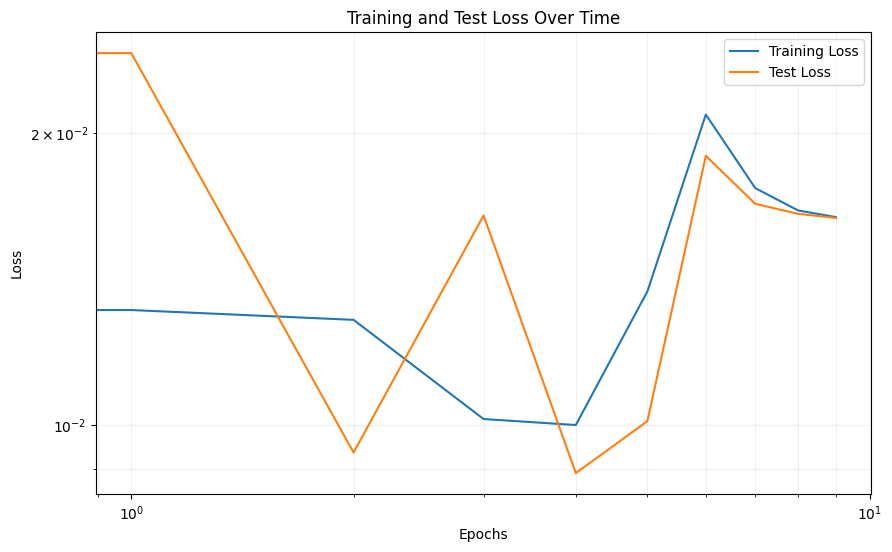

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


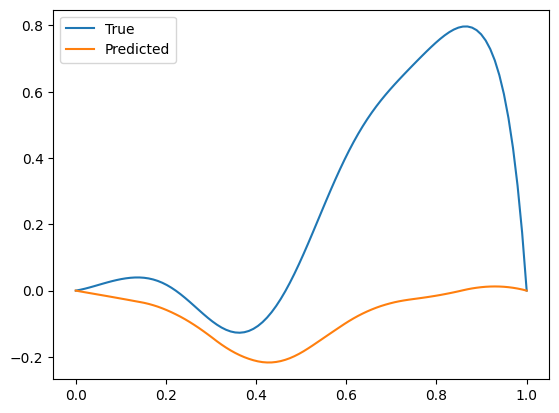

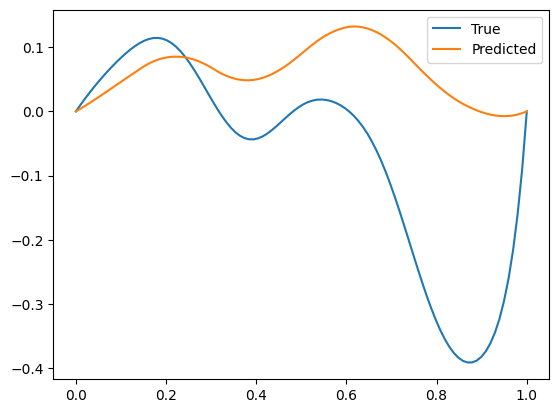

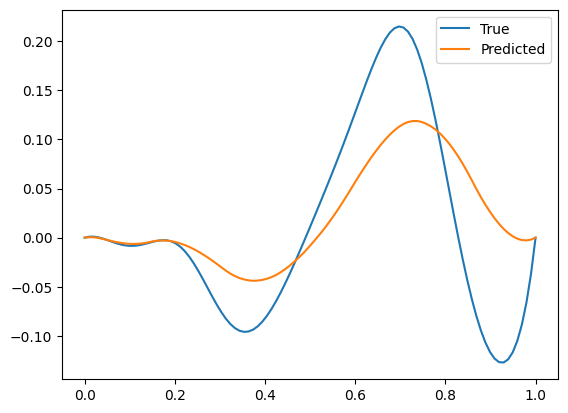

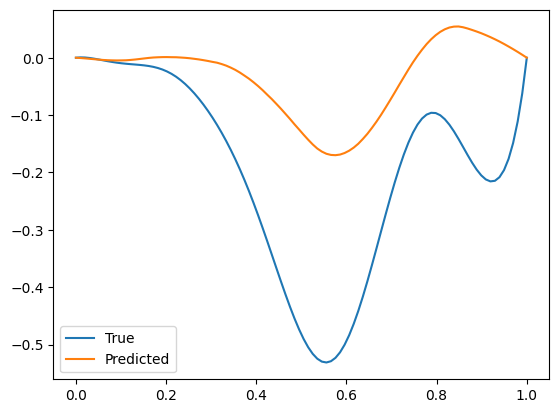

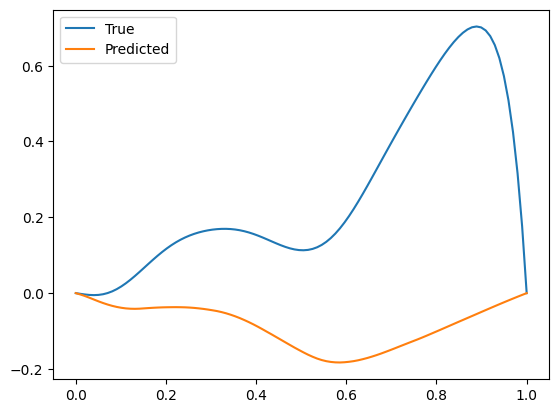

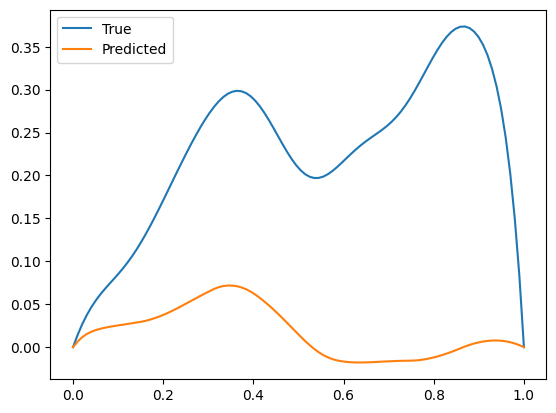

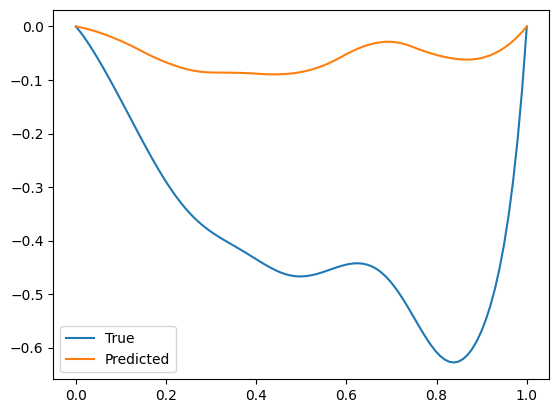

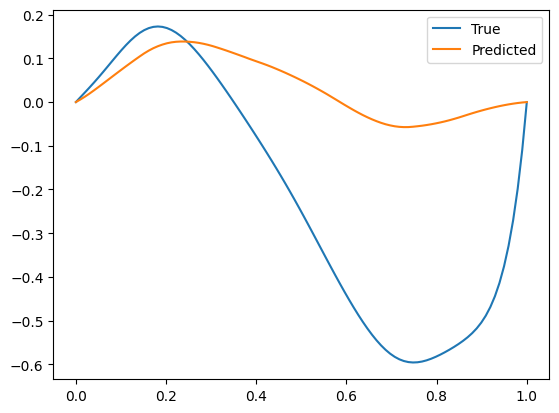

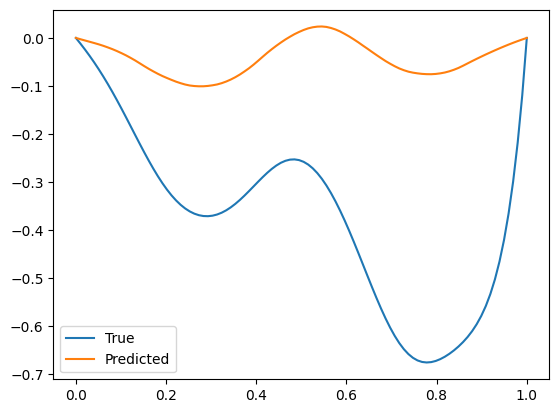

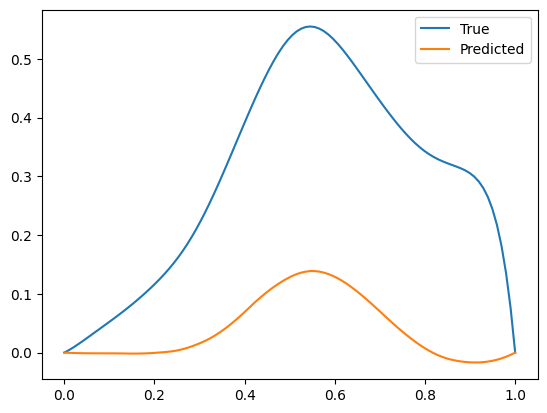

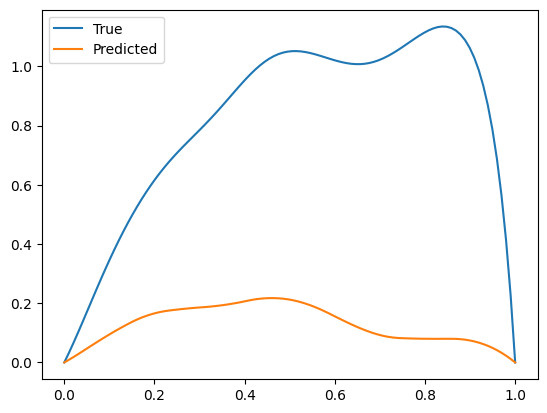

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-06 11:29:41,946 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-06 11:29:41,947 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.016247
2025-08-06 11:29:41,947 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.016260
Training progress:  10%|█         | 1/10 [00:02<00:26,  2.94s/it]2025-08-06 11:29:44,366 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-06 11:29:44,367 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.016168
2025-08-06 11:29:44,367 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.016179
Training progress:  20%|██        | 2/10 [00:05<00:21,  2.63s/it]2025-08-06 11:29:46,823 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-06 11:29:46,824 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.016112
2025-08-06 11:29:46,824 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.016135
Training progress:  30%|███       | 3/10 [00:07<00:17,  2.55s/i

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


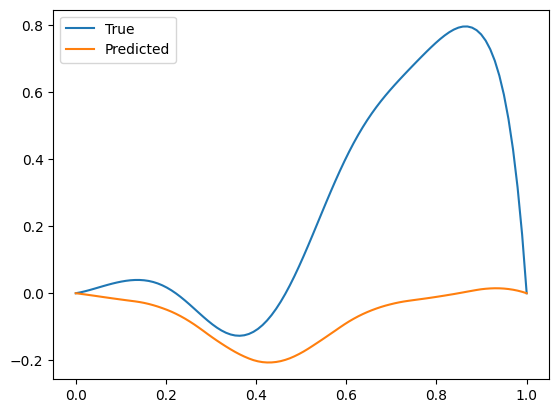

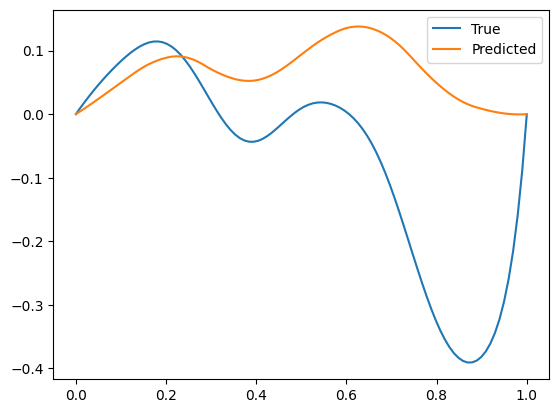

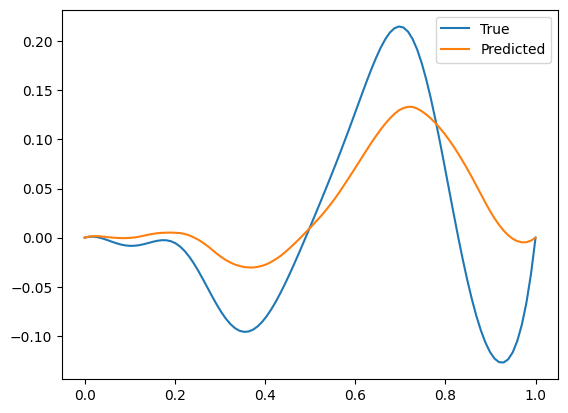

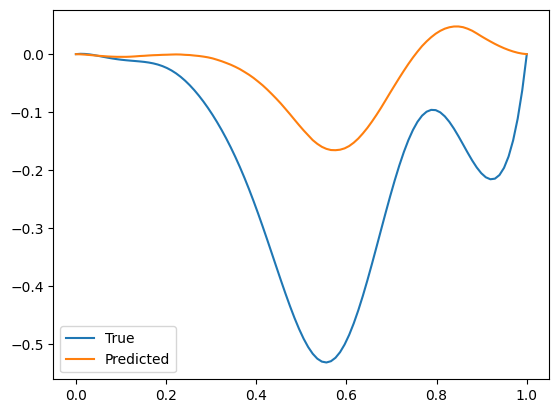

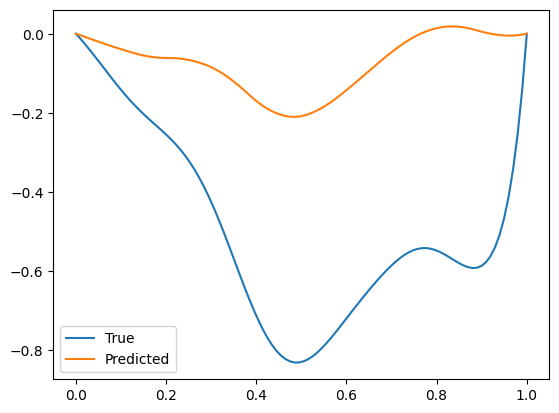

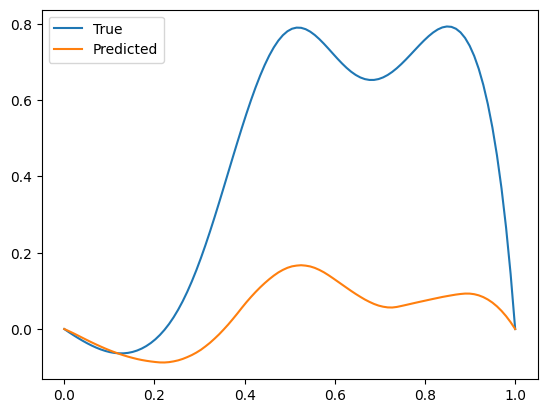

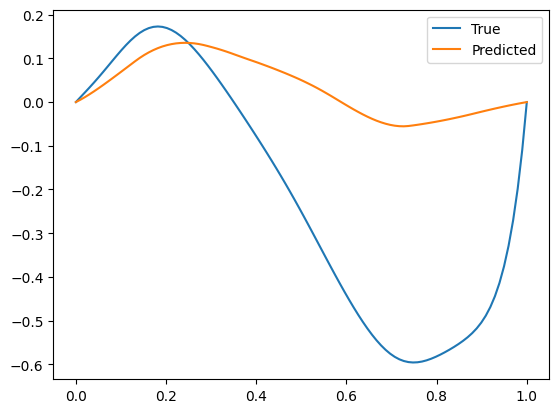

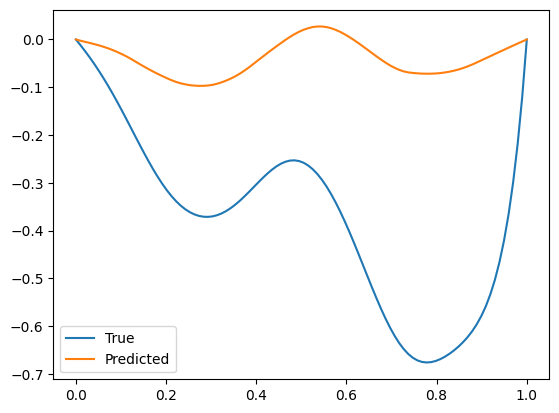

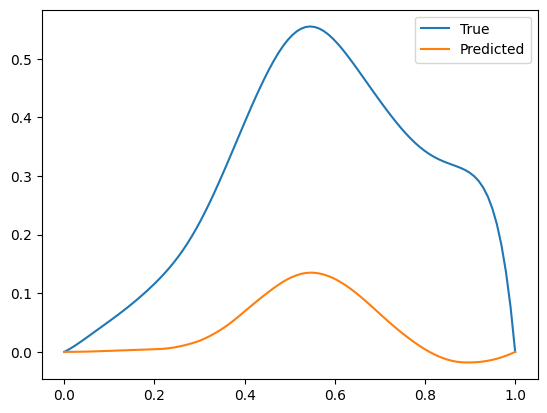

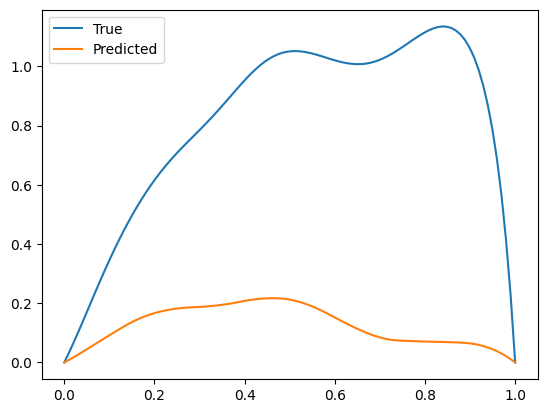

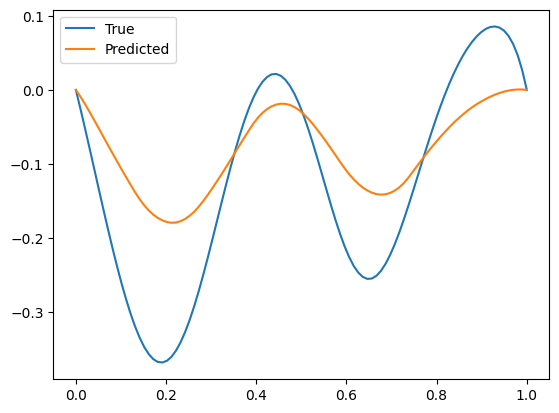

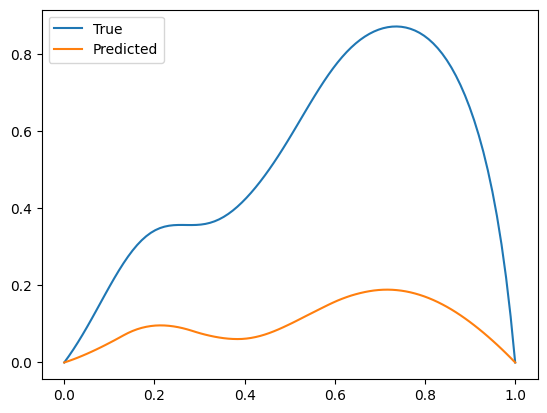

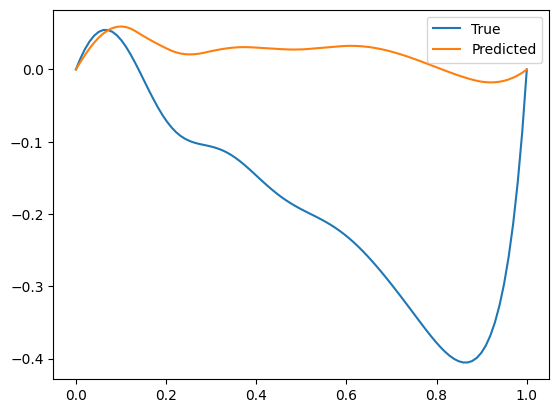

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-06 11:30:11,599 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-06 11:30:11,600 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.015825
2025-08-06 11:30:11,601 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.015870
Training progress:  10%|█         | 1/10 [00:03<00:27,  3.05s/it]2025-08-06 11:30:13,970 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-06 11:30:13,971 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.015807
2025-08-06 11:30:13,971 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.015865
Training progress:  20%|██        | 2/10 [00:05<00:21,  2.65s/it]2025-08-06 11:30:16,504 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-06 11:30:16,504 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.015763
2025-08-06 11:30:16,505 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.015799
Training progress:  30%|███       | 3/10 [00:07<00:18,  2.60s/i

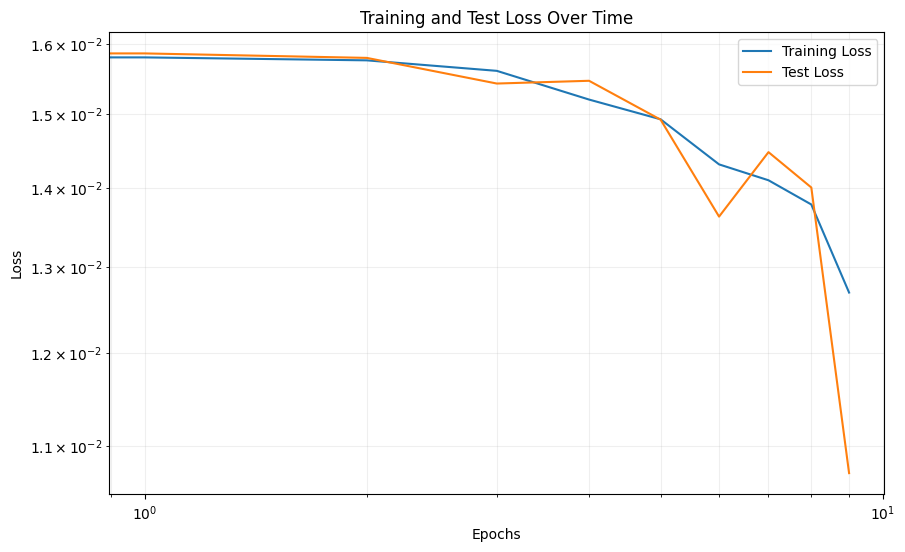

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


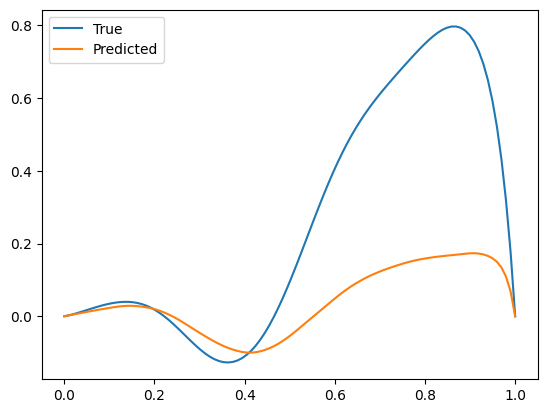

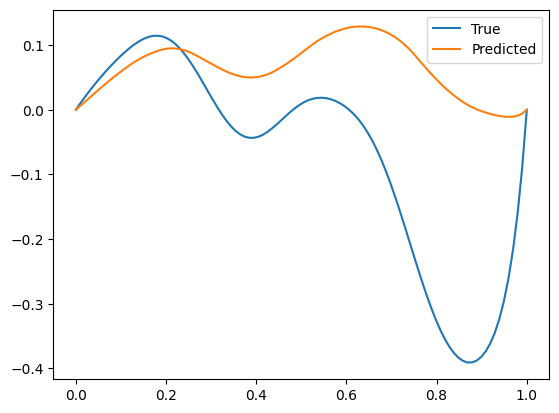

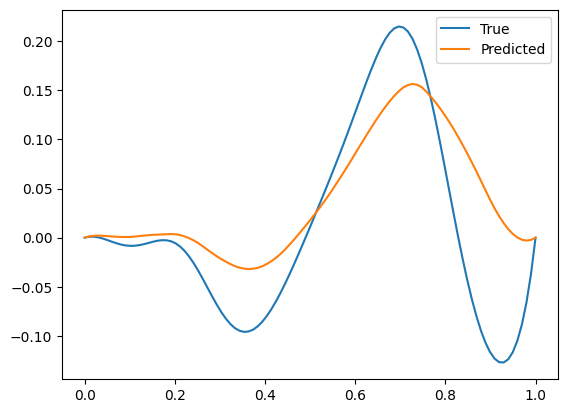

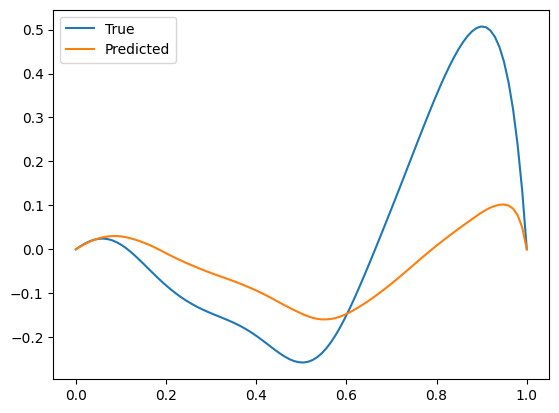

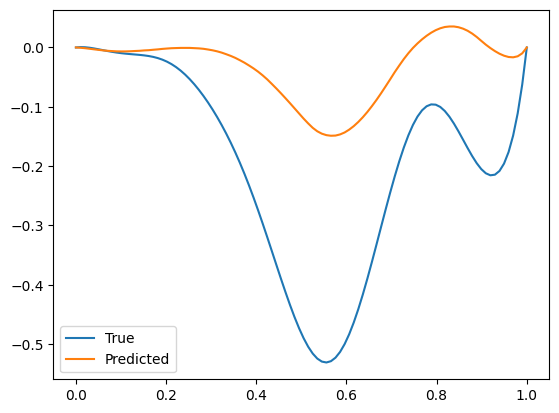

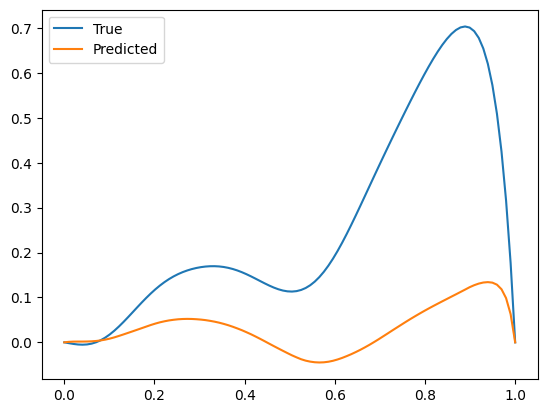

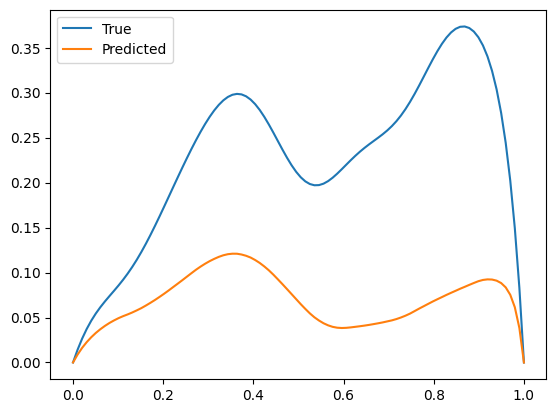

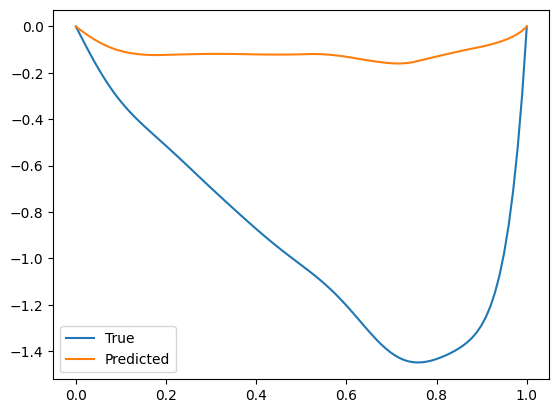

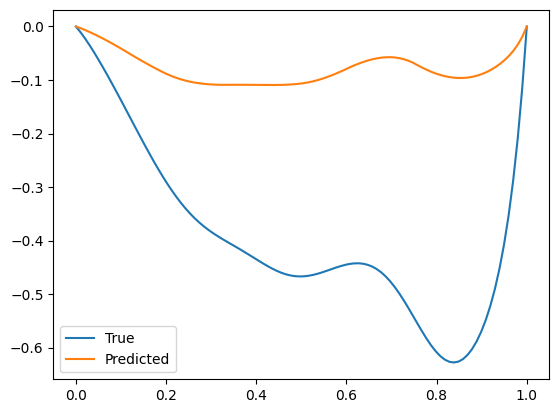

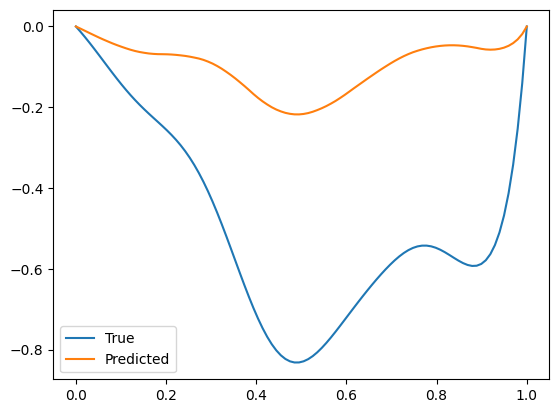

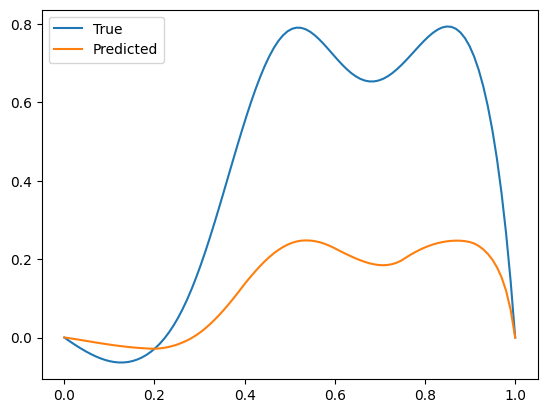

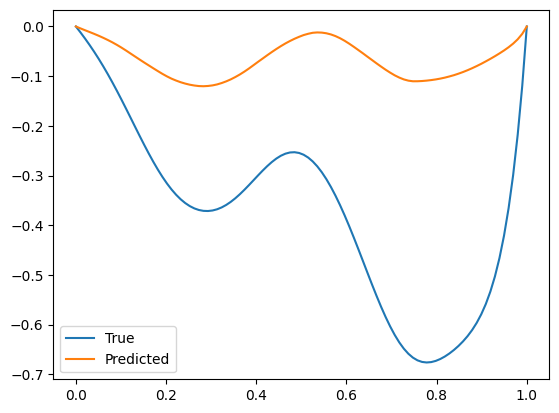

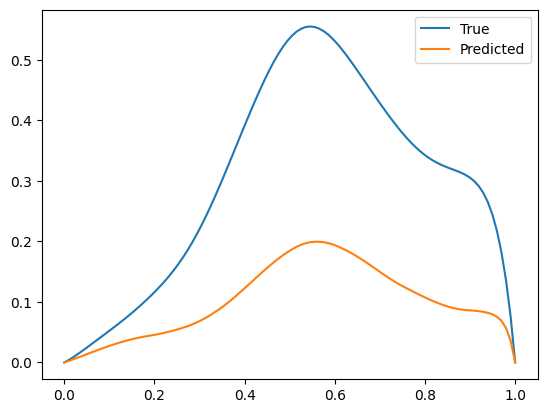

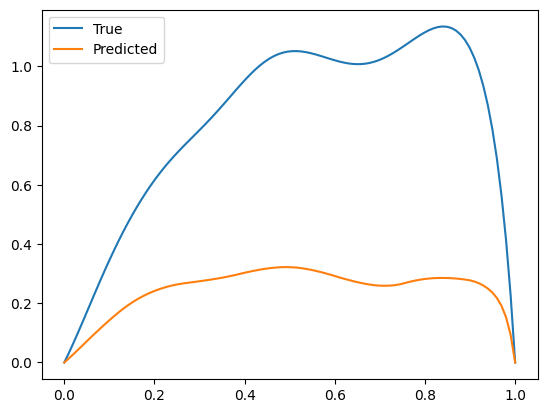

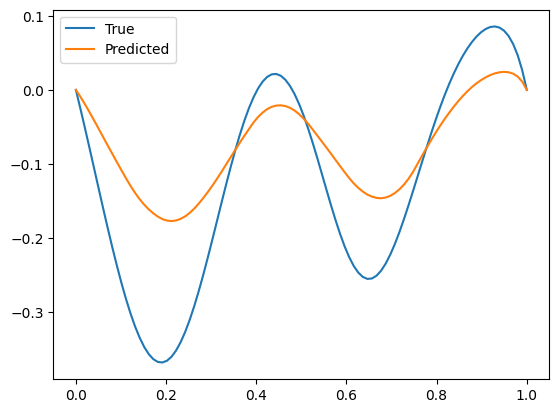

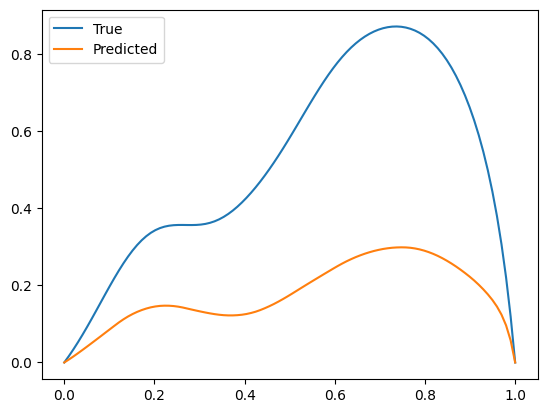

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-06 11:30:43,729 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-06 11:30:43,730 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.012932
2025-08-06 11:30:43,730 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.010661
Training progress:  10%|█         | 1/10 [00:03<00:27,  3.07s/it]2025-08-06 11:30:46,190 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-06 11:30:46,191 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.012098
2025-08-06 11:30:46,192 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.020214
Training progress:  20%|██        | 2/10 [00:05<00:21,  2.71s/it]2025-08-06 11:30:48,696 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
2025-08-06 11:30:48,697 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.012238
2025-08-06 11:30:48,698 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.008348
Training progress:  30%|███       | 3/10 [00:08<00:18,  2.62s/i

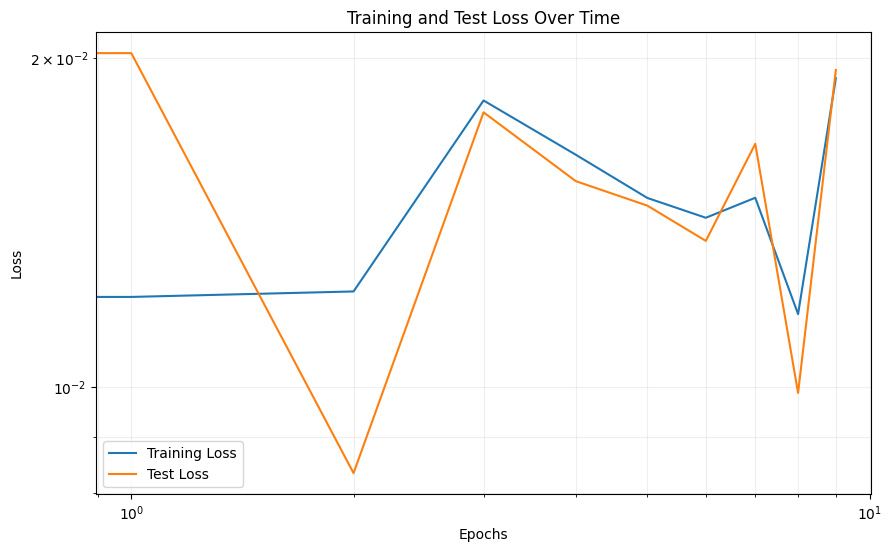

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


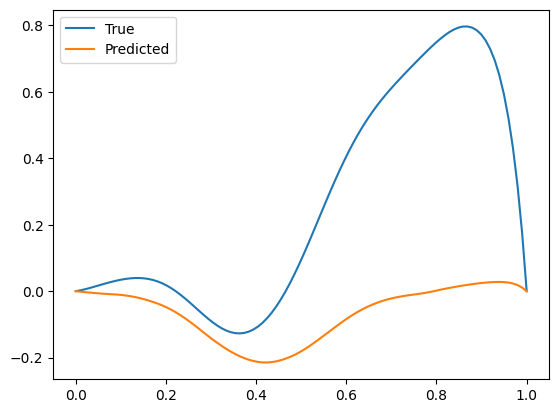

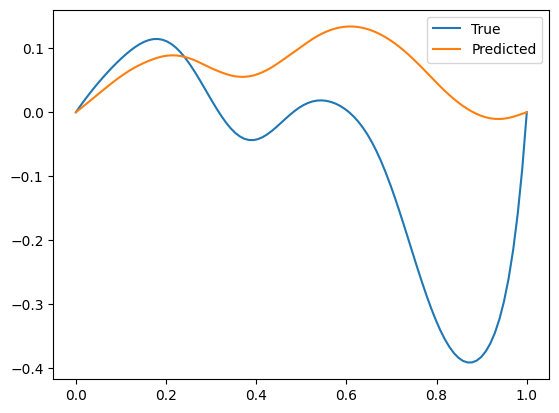

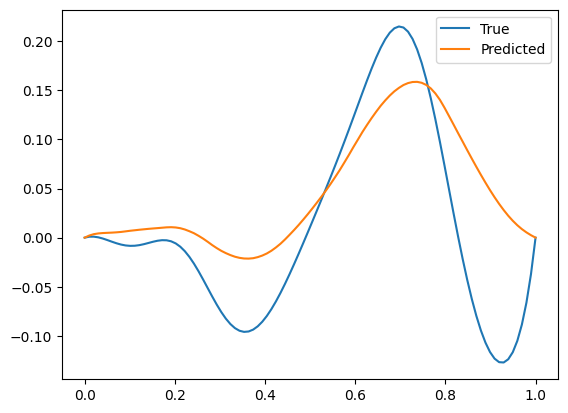

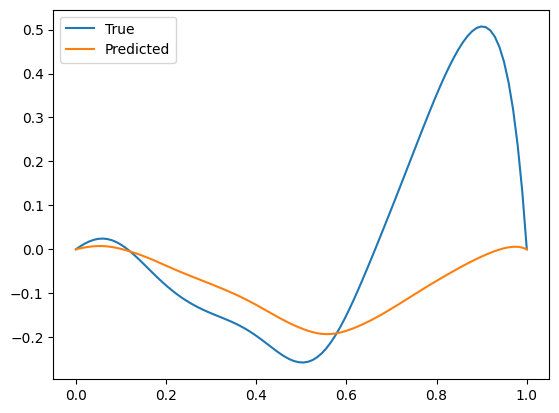

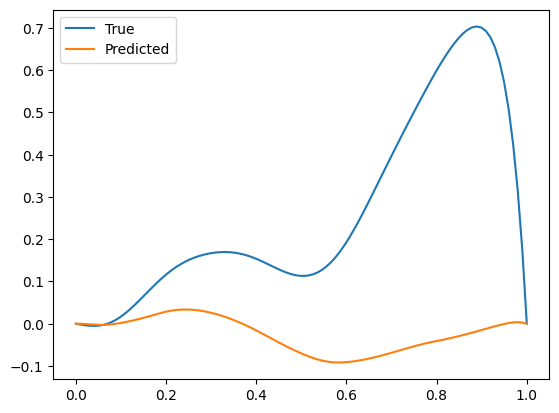

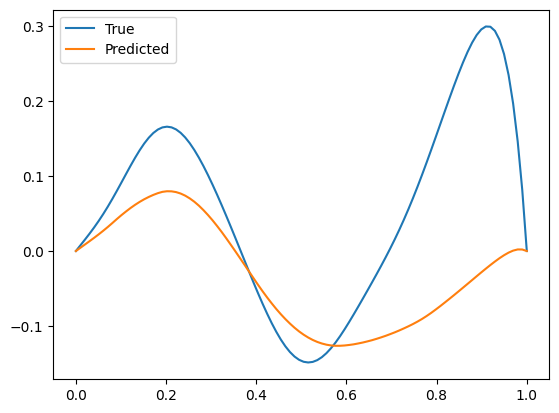

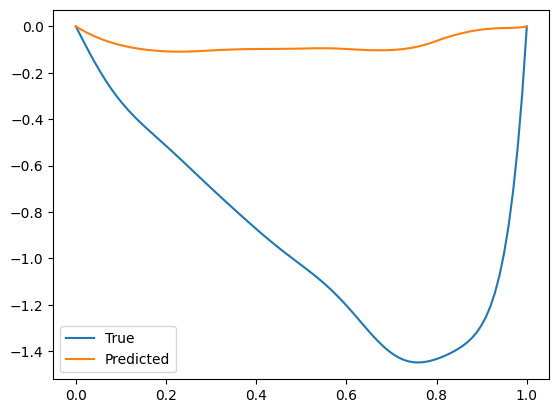

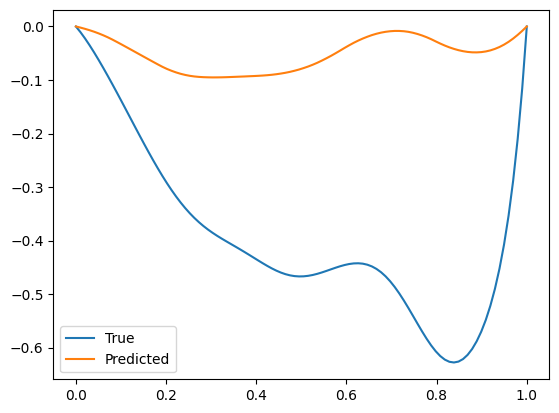

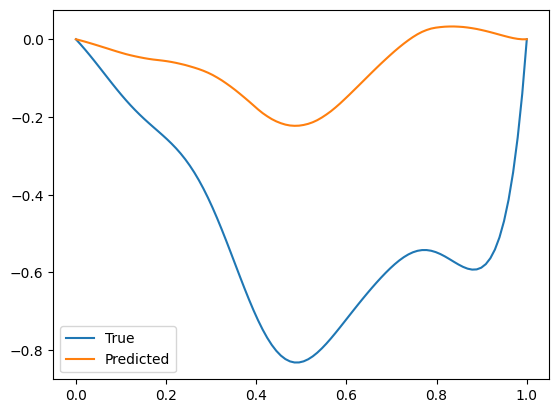

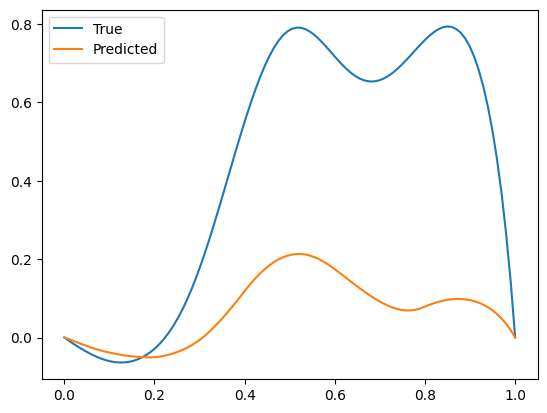

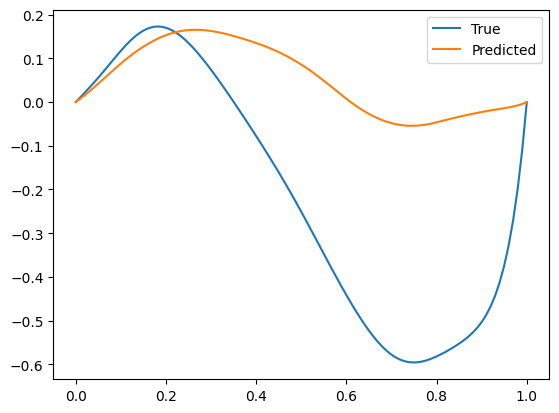

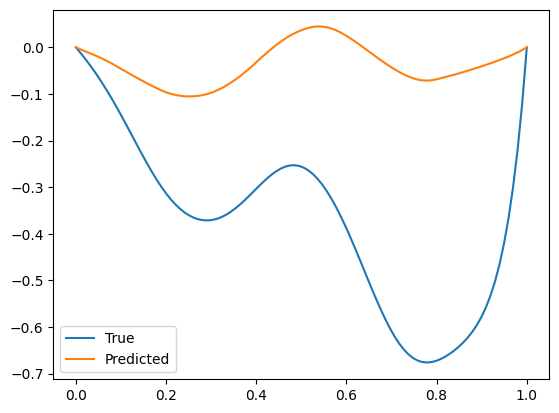

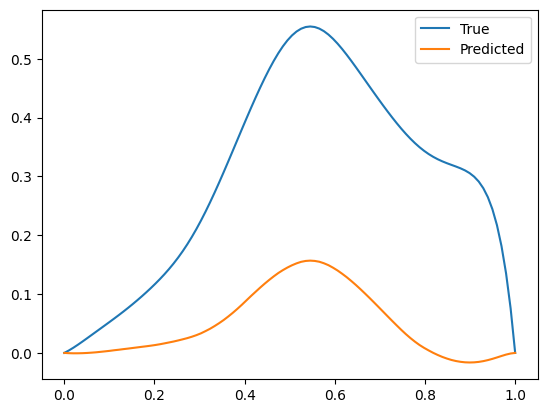

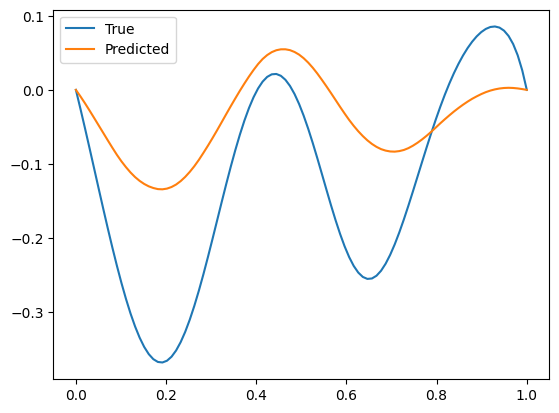

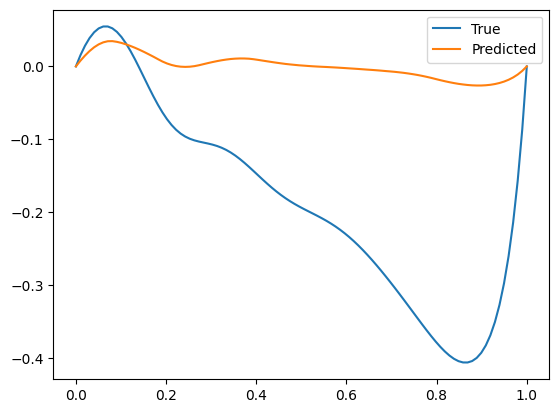

In [47]:
for _ in range(10):
    train_history = model.fit()
    plt.figure(figsize=(10,6))
    plt.plot(train_history[0], label='Training Loss')  # we plot training loss
    plt.plot(train_history[1], label='Test Loss')  # we plot test loss
    plt.yscale('log')  # we use log scale for better visualization
    plt.grid(True, which="both", ls="-", alpha=0.2)  # we add grid with transparency
    plt.xlabel('Epochs')  # we add x label
    plt.ylabel('Loss')  # we add y label
    plt.title('Training and Test Loss Over Time')  # we add title
    plt.legend()  # we add legend
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
        
        # then we can test the model
    mu_test, xs_test, sol_test = get_mu_xs_sol(folder_path,0.2,training=False)

    preds = model.predict(mu_test, xs_test)
    for i in range(20):
        plt.plot(xs_test[i,:],sol_test[i,:], label='True')
        plt.plot(xs_test[i,:],preds[i,:], label='Predicted')
        plt.legend()
        plt.show()

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


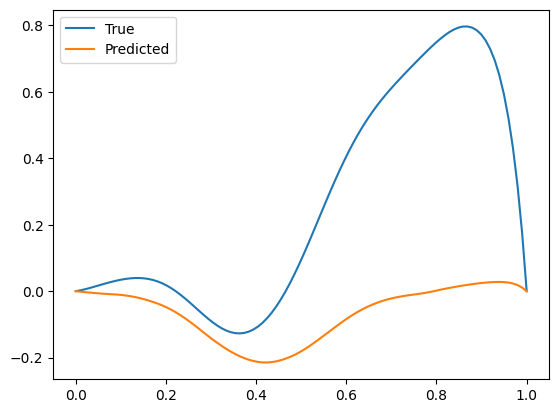

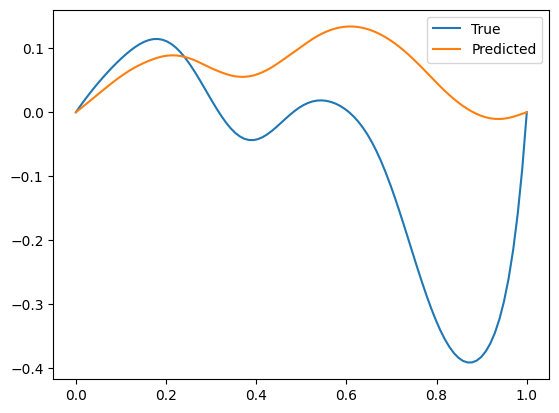

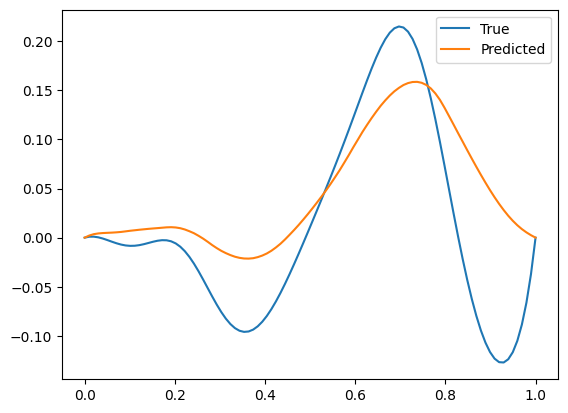

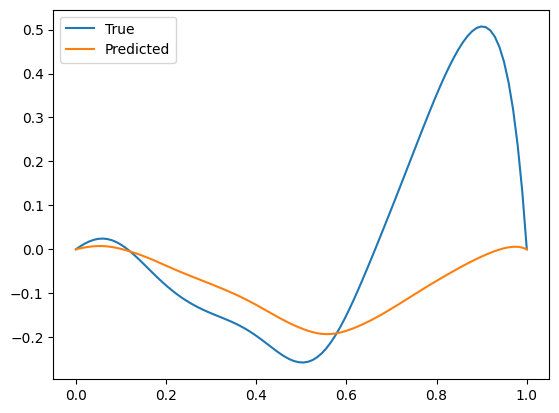

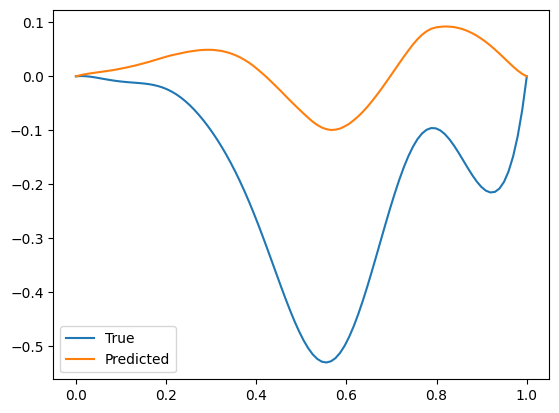

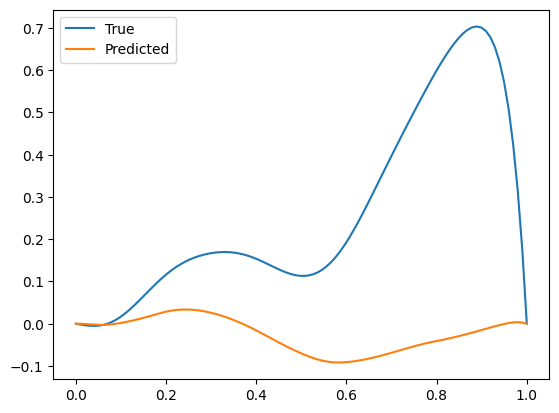

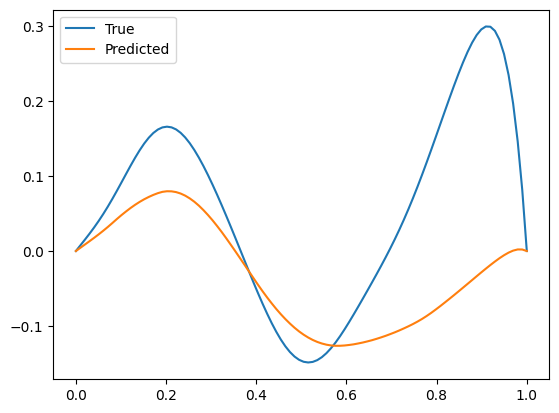

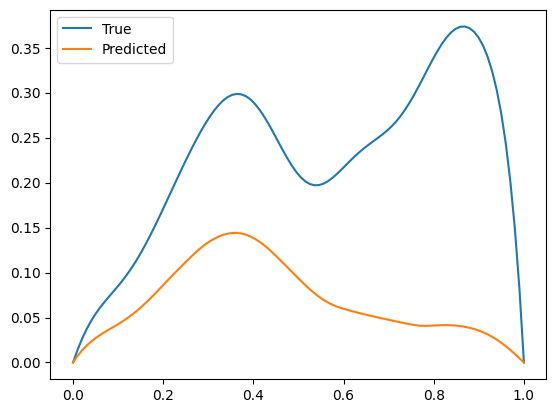

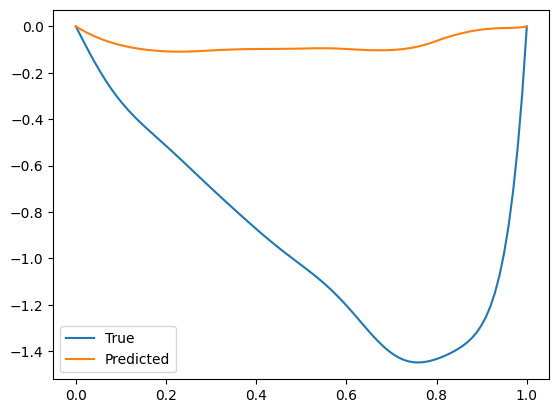

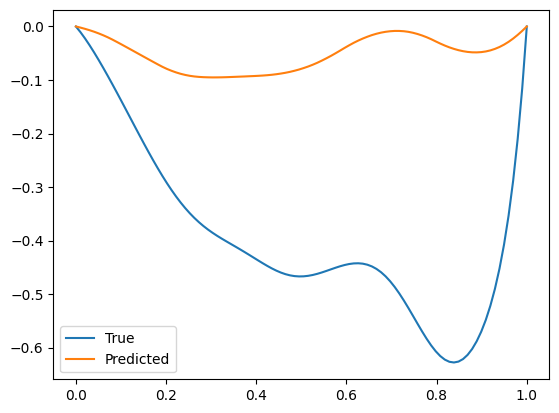

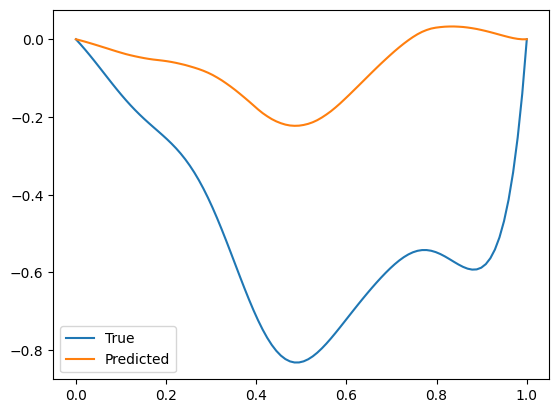

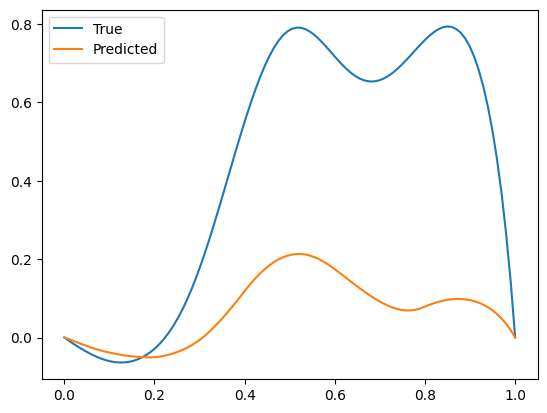

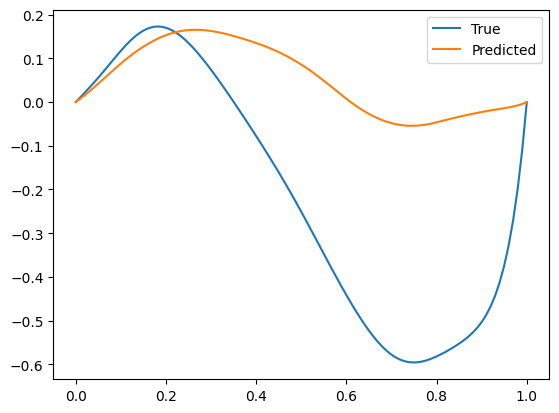

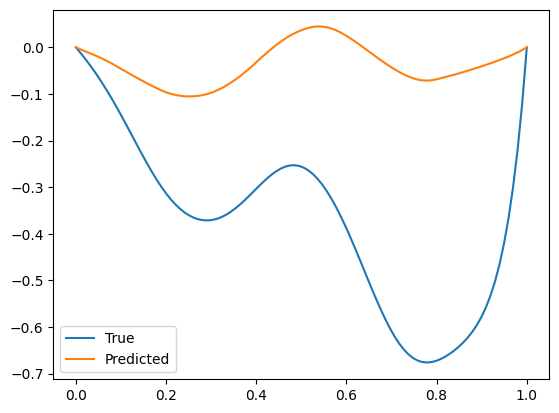

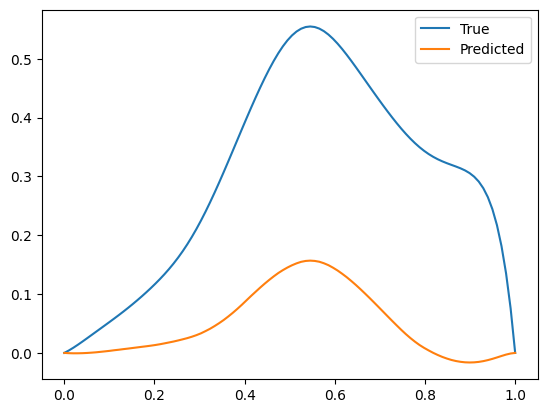

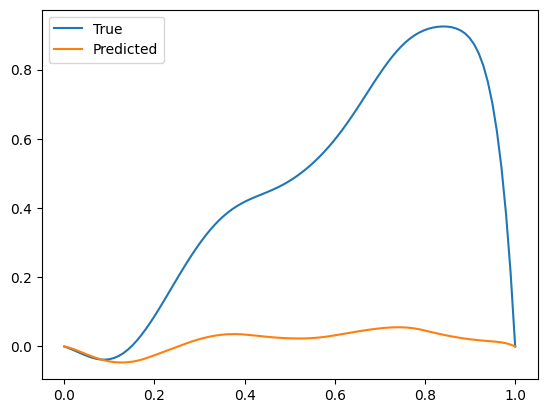

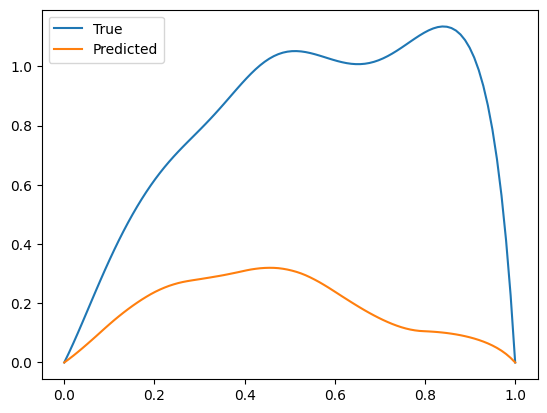

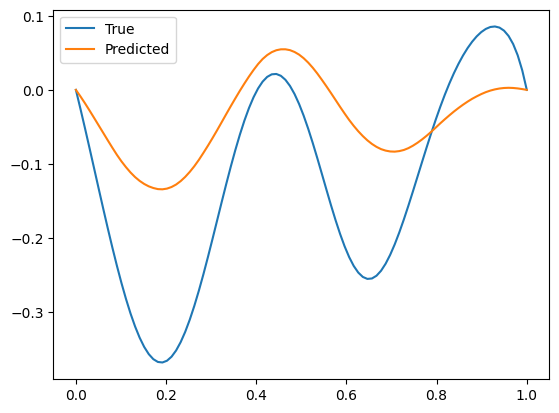

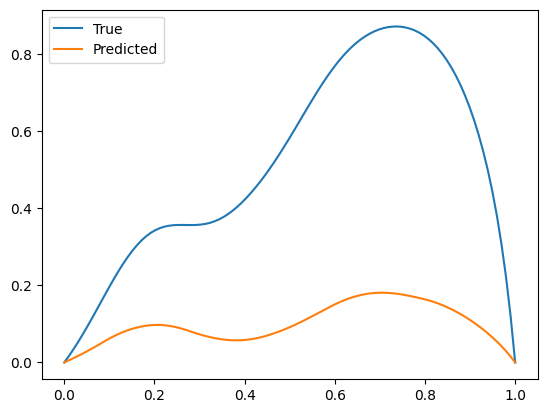

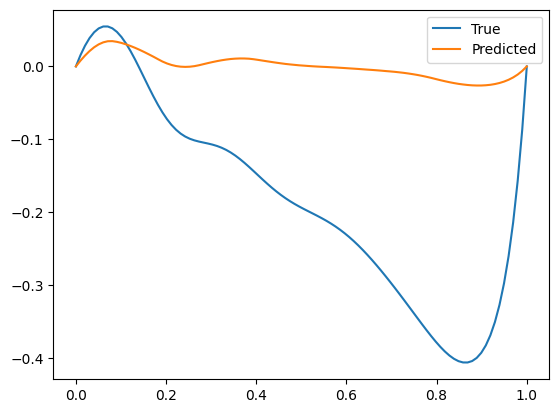

In [48]:
# then we can test the model
mu_test, xs_test, sol_test = get_mu_xs_sol(folder_path,0.2,training=False)

preds = model.predict(mu_test, xs_test)
for i in range(20):
    plt.plot(xs_test[i,:],sol_test[i,:], label='True')
    plt.plot(xs_test[i,:],preds[i,:], label='Predicted')
    plt.legend()
    plt.show()